In [25]:
# import needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

import warnings
warnings.filterwarnings('ignore')

In [26]:
#Read the data file
telecom = pd.read_csv("train.csv")
telecom.head()

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0   0        109             0.0             0.0             0.0   
1   1        109             0.0             0.0             0.0   
2   2        109             0.0             0.0             0.0   
3   3        109             0.0             0.0             0.0   
4   4        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8   arpu_6  \
0            6/30/2014            7/31/2014            8/31/2014   31.277   
1            6/30/2014            7/31/2014            8/31/2014    0.000   
2            6/30/2014            7/31/2014            8/31/2014   60.806   
3            6/30/2014            7/31/2014            8/31/2014  156.362   
4            6/30/2014            7/31/2014            8/31/2014  240.708   

    arpu_7  ...  sachet_3g_7  sachet_3g_8  fb_user_6  fb_user_7  fb_user_8  \
0   87.009  ...            0            0        NaN        NaN        NaN   
1  122.787  ...            0            0        NaN        1.0        NaN   
2  103.176  ...            0            0        NaN        NaN        NaN   
3  205.260  ...            0            0        NaN        NaN        NaN   
4  128.191  ...            1            0        1.0        1.0        1.0   

    aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  churn_probability  
0  1958         0.0         0.0         0.0                  0  
1   710         0.0         0.0         0.0                  0  
2   882         0.0         0.0         0.0                  0  
3   982         0.0         0.0         0.0                  0  
4   647         0.0         0.0         0.0                  0  

[5 rows x 172 columns]

In [27]:
#Check for data dimension
telecom.shape

(69999, 172)

In [28]:
telecom.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 172 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    id                        int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    arpu_6                    float64
 9    arpu_7                    float64
 10   arpu_8                    float64
 11   onnet_mou_6               float64
 12   onnet_mou_7               float64
 13   onnet_mou_8               float64
 14   offnet_mou_6              float64
 15   offnet_mou_7              float64
 16   offnet_mou_8              float64
 17   roam_ic_mou_6             float64
 18   roam_ic_mou_7             float64
 19   roam_ic_mou_8             float64
 20   roam

Original data file consists of 69999 rows and 172 columns. As per the results there are both numerical and categorical columns

## Handling missing values

In [29]:
#Checking for further missing values per column
null_value_series = telecom.isnull().sum()/len(telecom.index)*100

#Listing columns having more than 5% missing values
null_value_series = null_value_series[null_value_series > 5]
null_value_series

onnet_mou_8                  5.290076
offnet_mou_8                 5.290076
roam_ic_mou_8                5.290076
roam_og_mou_8                5.290076
loc_og_t2t_mou_8             5.290076
loc_og_t2m_mou_8             5.290076
loc_og_t2f_mou_8             5.290076
loc_og_t2c_mou_8             5.290076
loc_og_mou_8                 5.290076
std_og_t2t_mou_8             5.290076
std_og_t2m_mou_8             5.290076
std_og_t2f_mou_8             5.290076
std_og_t2c_mou_8             5.290076
std_og_mou_8                 5.290076
isd_og_mou_8                 5.290076
spl_og_mou_8                 5.290076
og_others_8                  5.290076
loc_ic_t2t_mou_8             5.290076
loc_ic_t2m_mou_8             5.290076
loc_ic_t2f_mou_8             5.290076
loc_ic_mou_8                 5.290076
std_ic_t2t_mou_8             5.290076
std_ic_t2m_mou_8             5.290076
std_ic_t2f_mou_8             5.290076
std_ic_t2o_mou_8             5.290076
std_ic_mou_8                 5.290076
spl_ic_mou_8

#### There are many columns having > 70 % missing values but zero columns are having missing values

### In context of business its important to keep values for rechange columns and hence imputing zero for all rechange columns

In [30]:
recharge_columns = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8',
                 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8',
                 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8'
                 ]

In [31]:
# impute missing values with 0
telecom[recharge_columns] = telecom[recharge_columns].apply(lambda x: x.fillna(0))

In [32]:
# now, let's make sure values are imputed correctly
print("Missing value ratio:\n")
print(telecom[recharge_columns].isnull().sum()*100/telecom.shape[1])

# summary
print("\n\nSummary statistics\n")
print(telecom[recharge_columns].describe(include='all'))

Missing value ratio:

total_rech_data_6     0.0
total_rech_data_7     0.0
total_rech_data_8     0.0
max_rech_data_6       0.0
max_rech_data_7       0.0
max_rech_data_8       0.0
av_rech_amt_data_6    0.0
av_rech_amt_data_7    0.0
av_rech_amt_data_8    0.0
dtype: float64


Summary statistics

       total_rech_data_6  total_rech_data_7  total_rech_data_8  \
count       69999.000000       69999.000000       69999.000000   
mean            0.619309           0.683981           0.697867   
std             1.762010           1.943193           1.973434   
min             0.000000           0.000000           0.000000   
25%             0.000000           0.000000           0.000000   
50%             0.000000           0.000000           0.000000   
75%             1.000000           1.000000           1.000000   
max            61.000000          54.000000          60.000000   

       max_rech_data_6  max_rech_data_7  max_rech_data_8  av_rech_amt_data_6  \
count     69999.000000     69999

### Checking for columns having single value across all rows

In [33]:
#Checking for columns having majority of single values for the dataset and percentage of single value in each column
telecom.nunique().sort_values().head(25)

std_ic_t2o_mou_6         1
circle_id                1
loc_og_t2o_mou           1
std_og_t2o_mou           1
loc_ic_t2o_mou           1
last_date_of_month_6     1
last_date_of_month_7     1
last_date_of_month_8     1
std_ic_t2o_mou_8         1
std_og_t2c_mou_8         1
std_og_t2c_mou_7         1
std_og_t2c_mou_6         1
std_ic_t2o_mou_7         1
night_pck_user_6         2
night_pck_user_7         2
night_pck_user_8         2
churn_probability        2
fb_user_7                2
fb_user_8                2
fb_user_6                2
monthly_2g_6             5
monthly_2g_8             6
monthly_2g_7             6
monthly_3g_6            10
monthly_3g_8            12
dtype: int64

#### Many columns are having single values present for all the rows and hence dropping these columns as these columns won't be helpful in determining Chrun probability

In [34]:
#Create Data frame for Features and value counts
telecom_count_df = pd.DataFrame(telecom.nunique().sort_values()).reset_index()
telecom_count_df.columns = ['Features','Value_count']

#Get name of columns having Value_count = 1
single_value_col = telecom_count_df[telecom_count_df['Value_count'] == 1]['Features'].tolist()
single_value_col

['std_ic_t2o_mou_6',
 'circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'std_ic_t2o_mou_8',
 'std_og_t2c_mou_8',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_6',
 'std_ic_t2o_mou_7']

In [35]:
print("Shape before dropping single value columns : ", telecom.shape)
#Delete single value columns
telecom = telecom.drop(single_value_col,axis=1)
print("Shape after dropping single value columns : ", telecom.shape)

Shape before dropping single value columns :  (69999, 172)
Shape after dropping single value columns :  (69999, 159)


### Check the distribution of values for columns having 2 unique values

In [36]:
telecom.night_pck_user_6.value_counts(normalize=True)*100


0.0    97.472678
1.0     2.527322
Name: night_pck_user_6, dtype: float64

In [37]:
telecom.night_pck_user_7.value_counts(normalize=True)*100

0.0    97.593059
1.0     2.406941
Name: night_pck_user_7, dtype: float64

In [38]:
telecom.night_pck_user_8.value_counts(normalize=True)*100

0.0    97.898681
1.0     2.101319
Name: night_pck_user_8, dtype: float64

In [39]:
telecom.fb_user_6.value_counts(normalize=True)*100

1.0    91.632514
0.0     8.367486
Name: fb_user_6, dtype: float64

In [40]:
telecom.fb_user_7.value_counts(normalize=True)*100

1.0    90.95438
0.0     9.04562
Name: fb_user_7, dtype: float64

In [41]:
telecom.fb_user_8.value_counts(normalize=True)*100

1.0    89.031873
0.0    10.968127
Name: fb_user_8, dtype: float64

### Dropping columns having more than 93% of single values


In [42]:
print("Shape before dropping 93% single value columns : ", telecom.shape)
telecom = telecom.drop(['night_pck_user_6','night_pck_user_7','night_pck_user_8'],axis=1)
print("Shape after dropping 93% single value columns : ", telecom.shape)

Shape before dropping 93% single value columns :  (69999, 159)
Shape after dropping 93% single value columns :  (69999, 156)


### Computing categorical and numeric columns

In [43]:
#Numeric
numeric_col = list(telecom.dtypes[telecom.dtypes != 'object'].index)
print((numeric_col))

['id', 'arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6', 'og_others_7', 'og_others_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8

In [44]:
cat_col = list(telecom.dtypes[telecom.dtypes == 'object'].index)
print((cat_col))

['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8']


In [45]:
#From above data ID column from numeric type and Date columns from categorical types can be dropped
telecom = telecom.drop(cat_col,axis=1)
telecom = telecom.drop(['id'],axis=1)
print("Shape after dropping ID and date columns ", telecom.shape)


Shape after dropping ID and date columns  (69999, 149)


### Drop variables with more than a given threshold of missing values

In [46]:
# Below code gives percentage of null in every column
null_percentage = telecom.isnull().sum()/telecom.shape[0]*100

# Below code gives list of columns having more than 70% null
col_to_drop = null_percentage[null_percentage>70].keys()

intial_cols = telecom.shape[1]
telecom = telecom.drop(col_to_drop, axis=1)

In [47]:
print("Columns dropped due to 70% missing values \n")
print("\n".join(col_to_drop.to_list()))
print("\n{0} columns dropped.".format(intial_cols-telecom.shape[1]))

Columns dropped due to 70% missing values 

count_rech_2g_6
count_rech_2g_7
count_rech_2g_8
count_rech_3g_6
count_rech_3g_7
count_rech_3g_8
arpu_3g_6
arpu_3g_7
arpu_3g_8
arpu_2g_6
arpu_2g_7
arpu_2g_8
fb_user_6
fb_user_7
fb_user_8

15 columns dropped.


### Impute with mice for other missing values

In [48]:
# using MICE technique to impute missing values in the rest of the columns
from fancyimpute import IterativeImputer as MICE
telecom_imputed = MICE().fit_transform(telecom)

In [220]:
# convert imputed numpy array to pandas dataframe
telecom = pd.DataFrame(telecom_imputed, columns=telecom.columns)
print(telecom.isnull().sum()*100/telecom.shape[0])

ValueError: Shape of passed values is (69999, 134), indices imply (69999, 139)

Data is cleaned with zero missing values

### Derive high value customers
1. From the data set we noticed that if data and recharge value is decreasing in Aug month compared to previous months, such customer are more likely to churn
2. It is important to retain high value customers and determine Churn rate for such high value customer
3. High value customers are calculated based on June and July month recharges

In [ ]:
# calculate total data recharge -->> Count of data recharge * Average data recharge
telecom['tot_data_rech_6'] = telecom.total_rech_data_6 * telecom.av_rech_amt_data_6
telecom['tot_data_rech_7'] = telecom.total_rech_data_7 * telecom.av_rech_amt_data_7

In [ ]:
#Overall Recharge amount = Total Data recharge + Total Call recharge
telecom['tot_data_call_rech_6'] = telecom['tot_data_rech_6'] + telecom['total_rech_amt_6']
telecom['tot_data_call_rech_7'] = telecom['tot_data_rech_7'] + telecom['total_rech_amt_7']

In [ ]:
# calculate average recharge(data + recharge) done by customer in June and July
telecom['av_tot_data_call_6_7'] = (telecom['tot_data_call_rech_6'] + telecom['tot_data_call_rech_7'])/2

In [ ]:
# look at the 70th percentile recharge amount
print("Recharge amount at 70th percentile: {0}".format(telecom.av_tot_data_call_6_7.quantile(0.7)))

Recharge amount at 70th percentile: 477.5


In [ ]:
# retain only those customers who have recharged their mobiles with more than or equal to 70th percentile amount
telecom_filtered = telecom.loc[telecom.av_tot_data_call_6_7 >= telecom.av_tot_data_call_6_7.quantile(0.7), :]
telecom_filtered = telecom_filtered.reset_index(drop=True)
telecom_filtered.shape

(21013, 139)

In [ ]:
#delete variables created to filter high-value customers
telecom_filtered = telecom_filtered.drop(['tot_data_rech_6', 'tot_data_rech_7',
                                      'tot_data_call_rech_6', 'tot_data_call_rech_7', 'av_tot_data_call_6_7'], axis=1)
telecom_filtered.shape

(21013, 134)

We are having 21013 high value customers after filtering based on 70th percentile recharge amount

## Calculate difference between 8th and previous months
The most important feature, in this situation, can be the difference between the 8th month and the previous months. The difference can be in patterns such as usage difference or recharge value difference. Let's calculate difference variable as the difference between 8th month and the average of 6th and 7th

In [ ]:
telecom_filtered['arpu_diff'] = telecom_filtered.arpu_8 - ((telecom_filtered.arpu_6 + telecom_filtered.arpu_7)/2)

telecom_filtered['onnet_mou_diff'] = telecom_filtered.onnet_mou_8 - ((telecom_filtered.onnet_mou_6 + telecom_filtered.onnet_mou_7)/2)

telecom_filtered['offnet_mou_diff'] = telecom_filtered.offnet_mou_8 - ((telecom_filtered.offnet_mou_6 + telecom_filtered.offnet_mou_7)/2)

telecom_filtered['roam_ic_mou_diff'] = telecom_filtered.roam_ic_mou_8 - ((telecom_filtered.roam_ic_mou_6 + telecom_filtered.roam_ic_mou_7)/2)

telecom_filtered['roam_og_mou_diff'] = telecom_filtered.roam_og_mou_8 - ((telecom_filtered.roam_og_mou_6 + telecom_filtered.roam_og_mou_7)/2)

telecom_filtered['loc_og_mou_diff'] = telecom_filtered.loc_og_mou_8 - ((telecom_filtered.loc_og_mou_6 + telecom_filtered.loc_og_mou_7)/2)

telecom_filtered['std_og_mou_diff'] = telecom_filtered.std_og_mou_8 - ((telecom_filtered.std_og_mou_6 + telecom_filtered.std_og_mou_7)/2)

telecom_filtered['isd_og_mou_diff'] = telecom_filtered.isd_og_mou_8 - ((telecom_filtered.isd_og_mou_6 + telecom_filtered.isd_og_mou_7)/2)

telecom_filtered['spl_og_mou_diff'] = telecom_filtered.spl_og_mou_8 - ((telecom_filtered.spl_og_mou_6 + telecom_filtered.spl_og_mou_7)/2)

telecom_filtered['total_og_mou_diff'] = telecom_filtered.total_og_mou_8 - ((telecom_filtered.total_og_mou_6 + telecom_filtered.total_og_mou_7)/2)

telecom_filtered['loc_ic_mou_diff'] = telecom_filtered.loc_ic_mou_8 - ((telecom_filtered.loc_ic_mou_6 + telecom_filtered.loc_ic_mou_7)/2)

telecom_filtered['std_ic_mou_diff'] = telecom_filtered.std_ic_mou_8 - ((telecom_filtered.std_ic_mou_6 + telecom_filtered.std_ic_mou_7)/2)

telecom_filtered['isd_ic_mou_diff'] = telecom_filtered.isd_ic_mou_8 - ((telecom_filtered.isd_ic_mou_6 + telecom_filtered.isd_ic_mou_7)/2)

telecom_filtered['spl_ic_mou_diff'] = telecom_filtered.spl_ic_mou_8 - ((telecom_filtered.spl_ic_mou_6 + telecom_filtered.spl_ic_mou_7)/2)

telecom_filtered['total_ic_mou_diff'] = telecom_filtered.total_ic_mou_8 - ((telecom_filtered.total_ic_mou_6 + telecom_filtered.total_ic_mou_7)/2)

telecom_filtered['total_rech_num_diff'] = telecom_filtered.total_rech_num_8 - ((telecom_filtered.total_rech_num_6 + telecom_filtered.total_rech_num_7)/2)

telecom_filtered['total_rech_amt_diff'] = telecom_filtered.total_rech_amt_8 - ((telecom_filtered.total_rech_amt_6 + telecom_filtered.total_rech_amt_7)/2)

telecom_filtered['max_rech_amt_diff'] = telecom_filtered.max_rech_amt_8 - ((telecom_filtered.max_rech_amt_6 + telecom_filtered.max_rech_amt_7)/2)

telecom_filtered['total_rech_data_diff'] = telecom_filtered.total_rech_data_8 - ((telecom_filtered.total_rech_data_6 + telecom_filtered.total_rech_data_7)/2)

telecom_filtered['max_rech_data_diff'] = telecom_filtered.max_rech_data_8 - ((telecom_filtered.max_rech_data_6 + telecom_filtered.max_rech_data_7)/2)

telecom_filtered['av_rech_amt_data_diff'] = telecom_filtered.av_rech_amt_data_8 - ((telecom_filtered.av_rech_amt_data_6 + telecom_filtered.av_rech_amt_data_7)/2)

telecom_filtered['vol_2g_mb_diff'] = telecom_filtered.vol_2g_mb_8 - ((telecom_filtered.vol_2g_mb_6 + telecom_filtered.vol_2g_mb_7)/2)

telecom_filtered['vol_3g_mb_diff'] = telecom_filtered.vol_3g_mb_8 - ((telecom_filtered.vol_3g_mb_6 + telecom_filtered.vol_3g_mb_7)/2)

## Data vis

Text(0.5, 1.0, 'Churn Distribution')

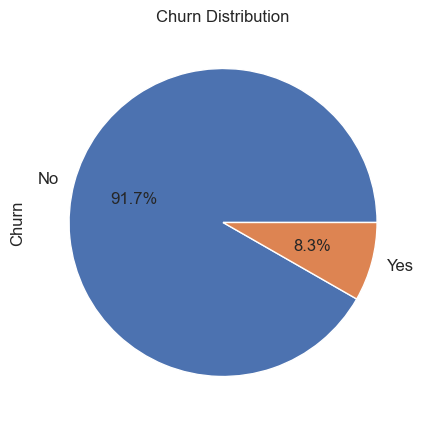

In [221]:
#Churn Distribution
churn_dist = (telecom_filtered['churn_probability'].value_counts()*100.0 /len(telecom_filtered)).plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(5,5), fontsize = 12 )                                                                           

churn_dist.set_ylabel('Churn',fontsize = 12)
churn_dist.set_title('Churn Distribution', fontsize = 12)

The data is skewed and majority of the customers i.e., **91.6% DO NOT Churn**


In [222]:
# function to create Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = "Telecom Churn"
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

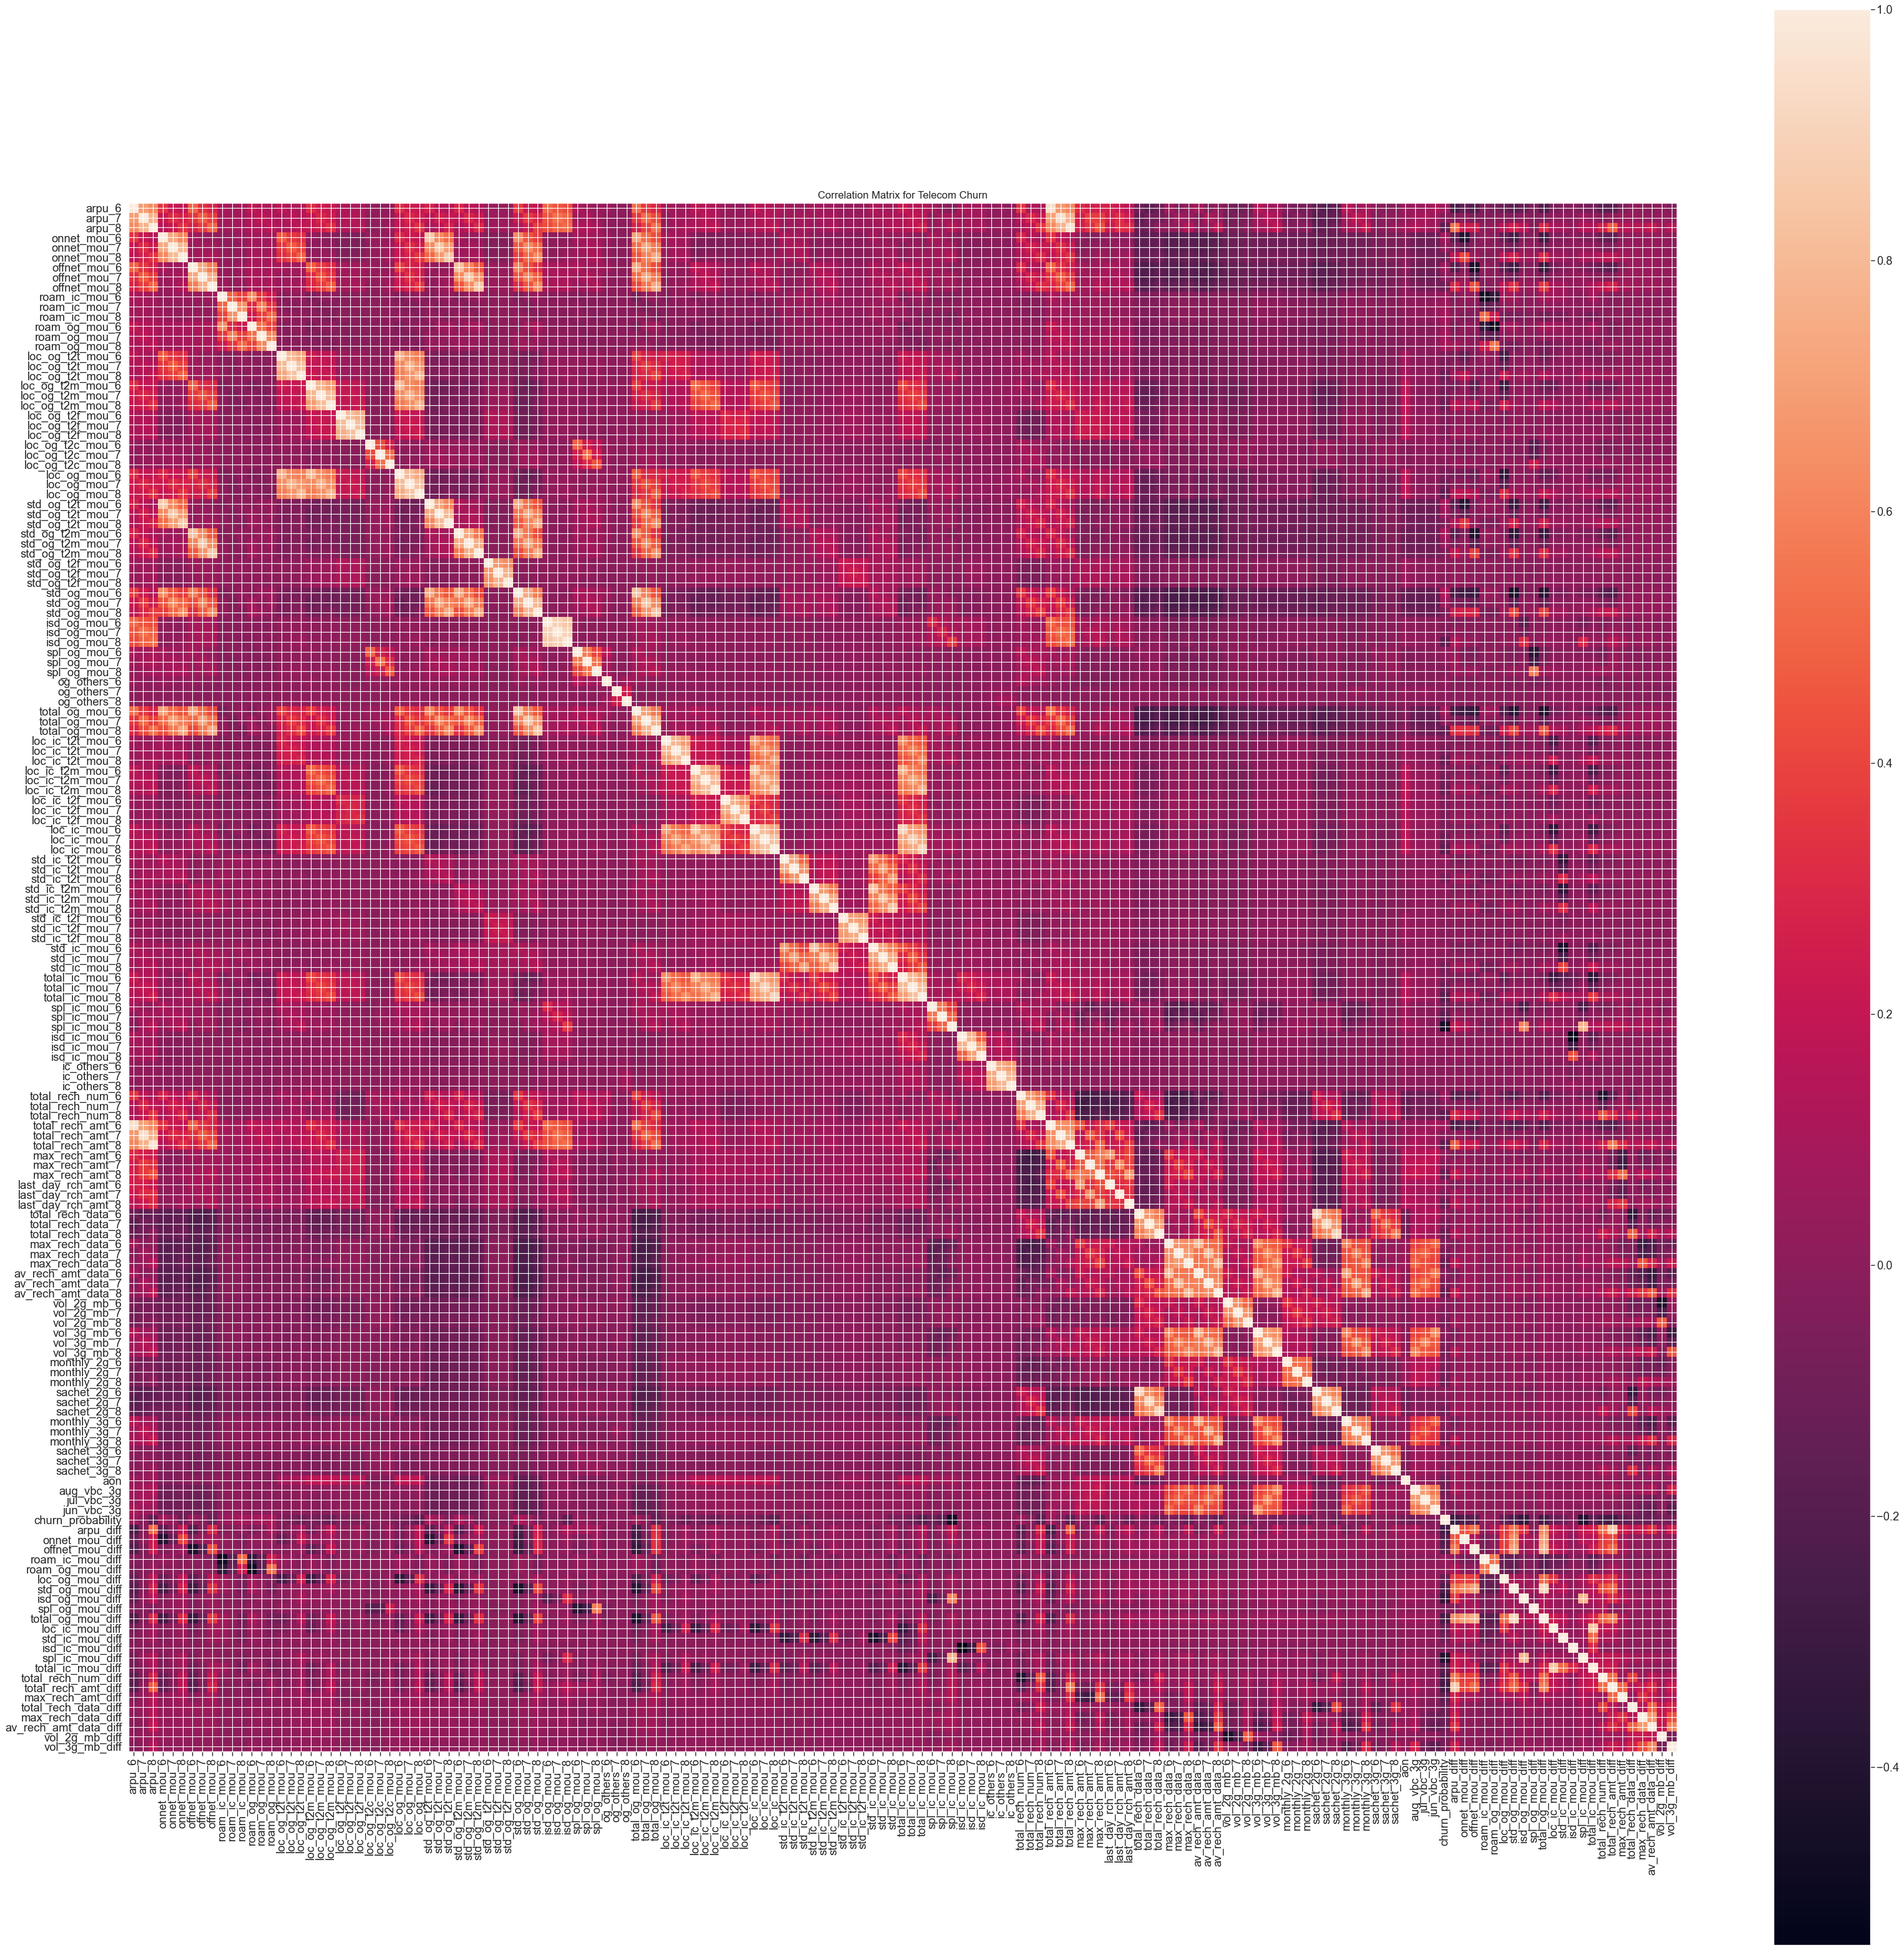

In [223]:
# Heatmap of high value customer
plotCorrelationMatrix(telecom_filtered, 50)

In [224]:
# function to plot scatter plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

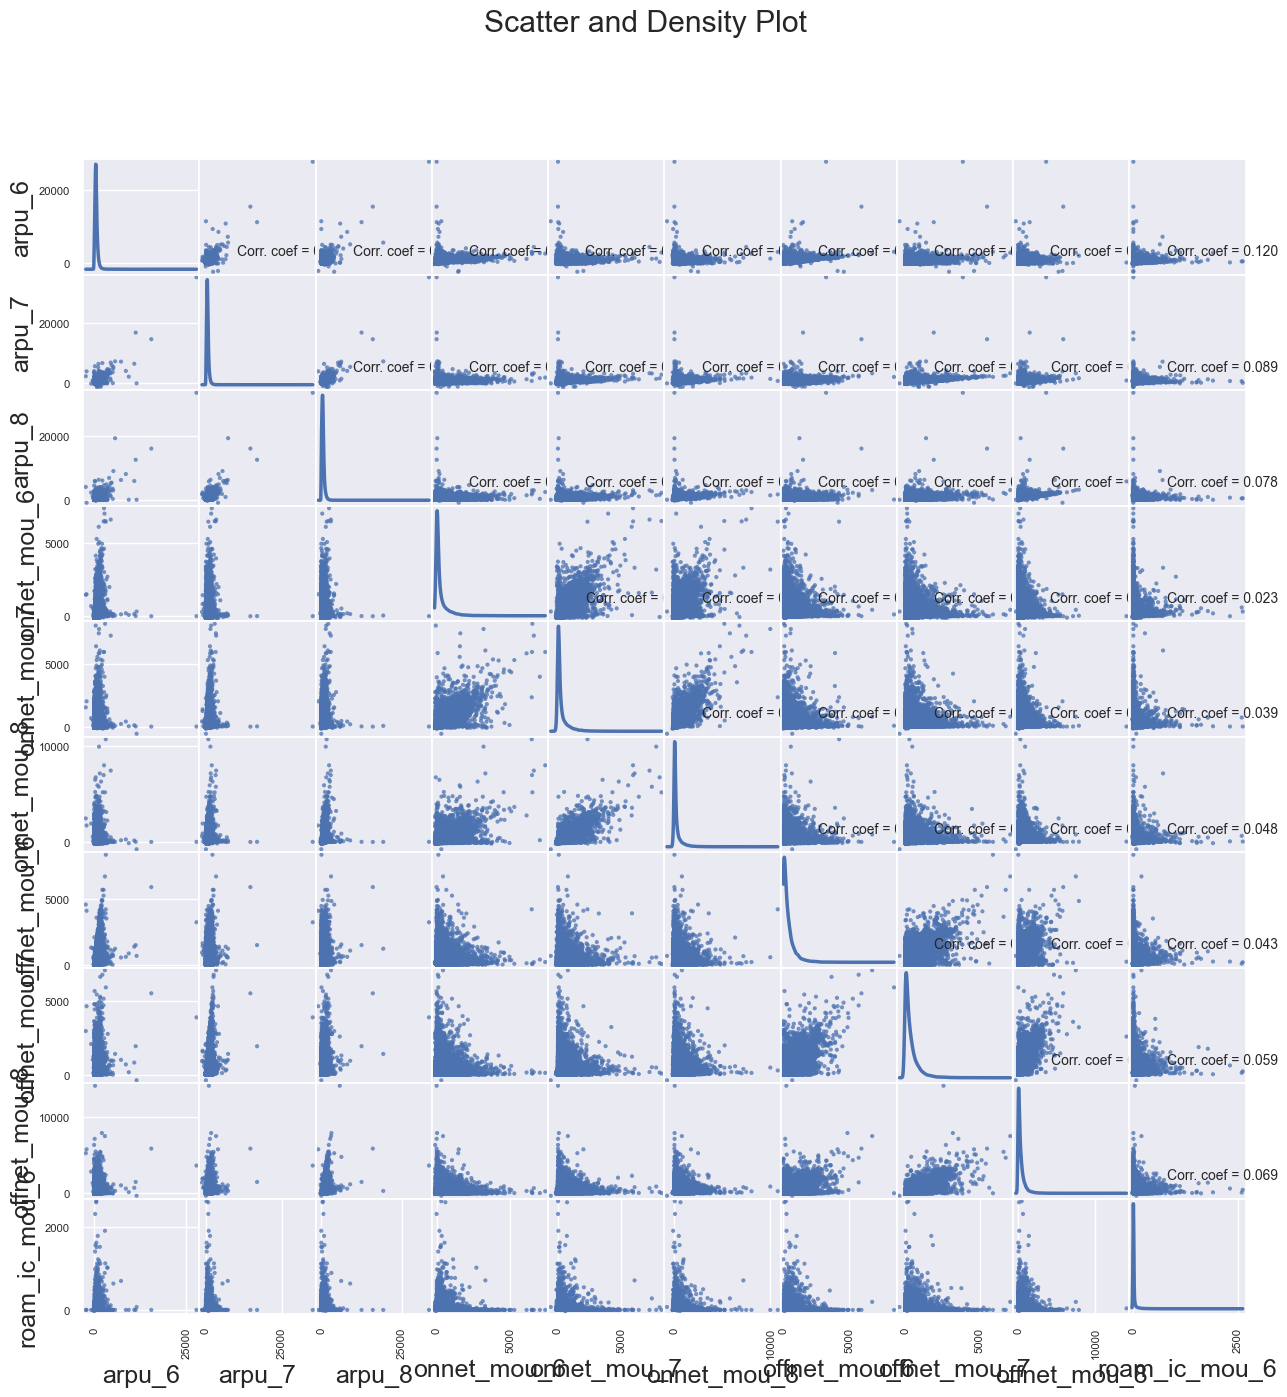

In [225]:
plotScatterMatrix(telecom_filtered, 15, 10)

Text(0.5, 1.0, 'Tenure Graph')

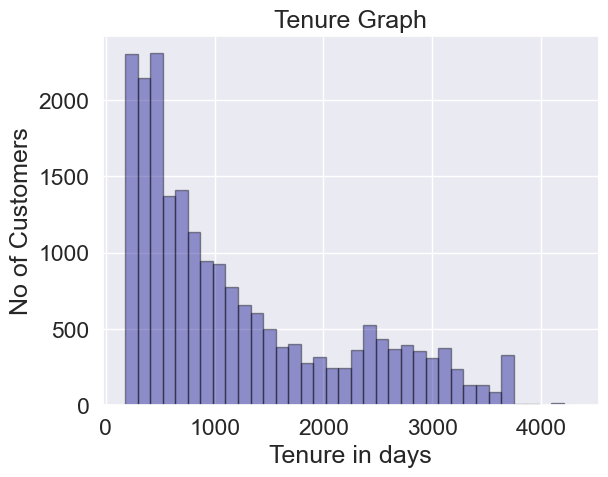

In [226]:
# Check the tenure of the customers
cust_tenure = sns.distplot(telecom_filtered['aon'], hist=True, kde=False, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 10})
cust_tenure.set_ylabel('No of Customers')
cust_tenure.set_xlabel('Tenure in days')
cust_tenure.set_title('Tenure Graph')

In [227]:
import seaborn as sns
# create plotting functions
def data_type(variable):
    if variable.dtype == np.int64 or variable.dtype == np.float64:
        return 'numerical'
    elif variable.dtype == 'category':
        return 'categorical'
    
def univariate(variable, stats=True):
    
    if data_type(variable) == 'numerical':
        sns.distplot(variable)
        if stats == True:
            print(variable.describe())
    
    elif data_type(variable) == 'categorical':
        sns.countplot(variable)
        if stats == True:
            print(variable.value_counts())
            
    else:
        print("Invalid variable passed: either pass a numeric variable or a categorical vairable.")

count    21013.000000
mean       558.458938
std        474.147345
min      -2258.709000
25%        307.718000
50%        482.616000
75%        700.552000
max      27731.088000
Name: arpu_6, dtype: float64


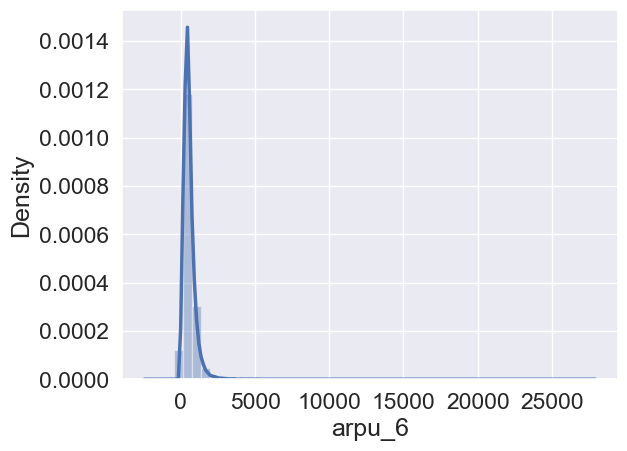

In [228]:
univariate(telecom_filtered.arpu_6)

count    21013.000000
mean       -68.437759
std        502.233995
min      -7213.410000
25%       -169.295000
50%        -13.985000
75%         68.485000
max      12768.705000
Name: total_og_mou_diff, dtype: float64


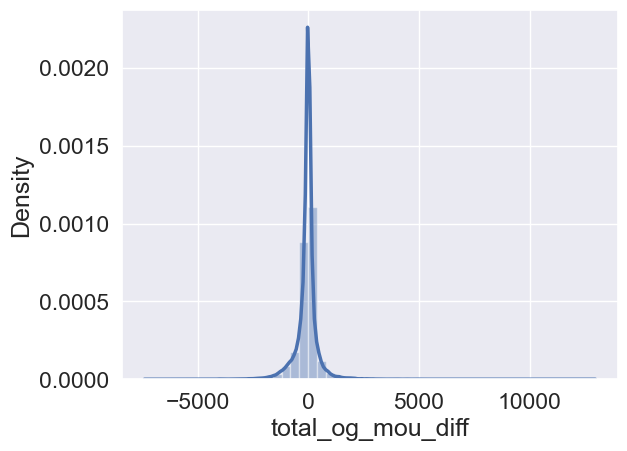

In [229]:
univariate(telecom_filtered.total_og_mou_diff)

count    21013.000000
mean       229.777297
std        467.516802
min       -767.156947
25%         10.290000
50%         65.340000
75%        238.040000
max      10752.560000
Name: onnet_mou_8, dtype: float64


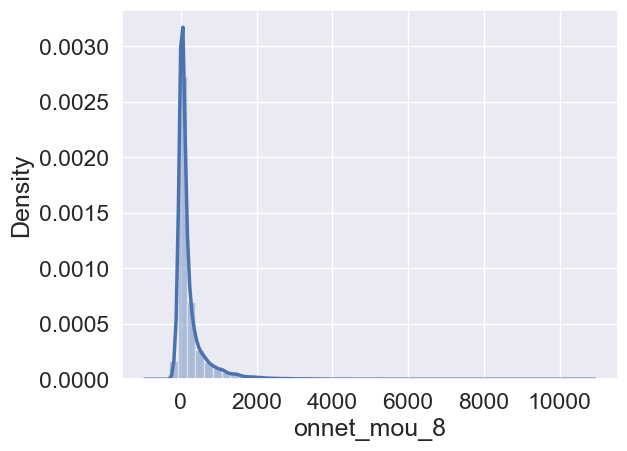

In [230]:
univariate(telecom_filtered.onnet_mou_8)

count    21013.000000
mean       -76.978394
std        418.972501
min      -6950.000000
25%       -245.000000
50%        -57.000000
75%         99.000000
max      14344.500000
Name: total_rech_amt_diff, dtype: float64


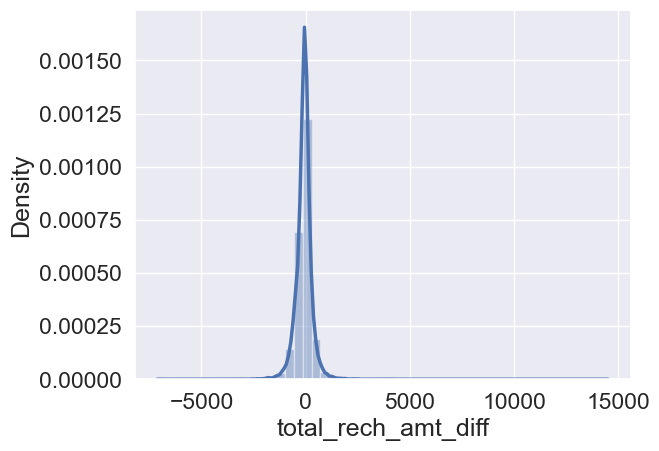

In [231]:
univariate(telecom_filtered.total_rech_amt_diff)

<AxesSubplot: xlabel='churn_probability', ylabel='aon'>

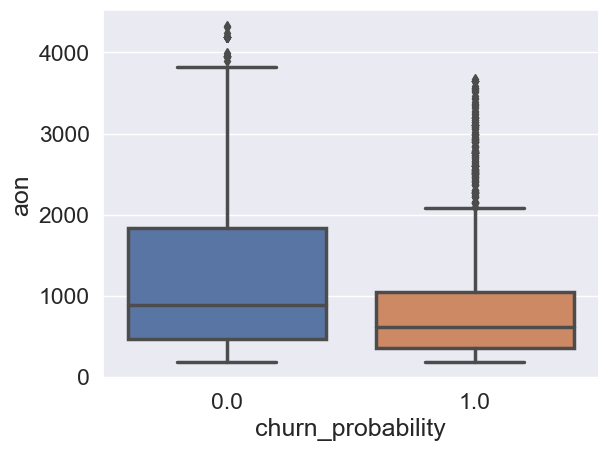

In [232]:
# Box-plot to check tenured customers v/s churn probability
sns.boxplot(x = telecom_filtered.churn_probability, y = telecom_filtered.aon)

Tenured customers do no churn and they keep availing telecom services

<AxesSubplot: xlabel='churn_probability', ylabel='av_rech_amt_data_diff'>

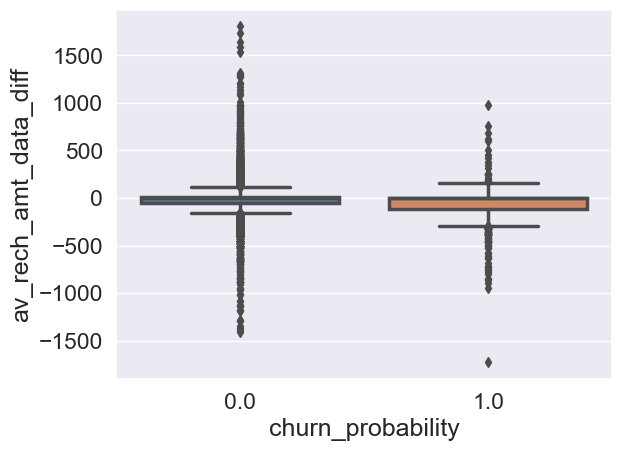

In [233]:
# Box-plot to check avg. recharge amount v/s churn probability
sns.boxplot(x = telecom_filtered.churn_probability, y = telecom_filtered.av_rech_amt_data_diff)

In [234]:
telecom_filtered['aon']

0         647.0
1         602.0
2         455.0
3        1219.0
4         573.0
          ...  
21008     283.0
21009     251.0
21010    1507.0
21011     221.0
21012     277.0
Name: aon, Length: 21013, dtype: float64

In [235]:
# Binning of months 
tn_range = [100, 365, 730, 1200, 1500]
tn_label = [ '0-6 Months', '6-12 Months', '1-2 Yrs', '2-5 Yrs']
telecom_filtered['tenure_range'] = pd.cut(telecom_filtered['aon'], tn_range, labels=tn_label)
telecom_filtered['tenure_range'].head()

0    6-12 Months
1    6-12 Months
2    6-12 Months
3        2-5 Yrs
4    6-12 Months
Name: tenure_range, dtype: category
Categories (4, object): ['0-6 Months' < '6-12 Months' < '1-2 Yrs' < '2-5 Yrs']

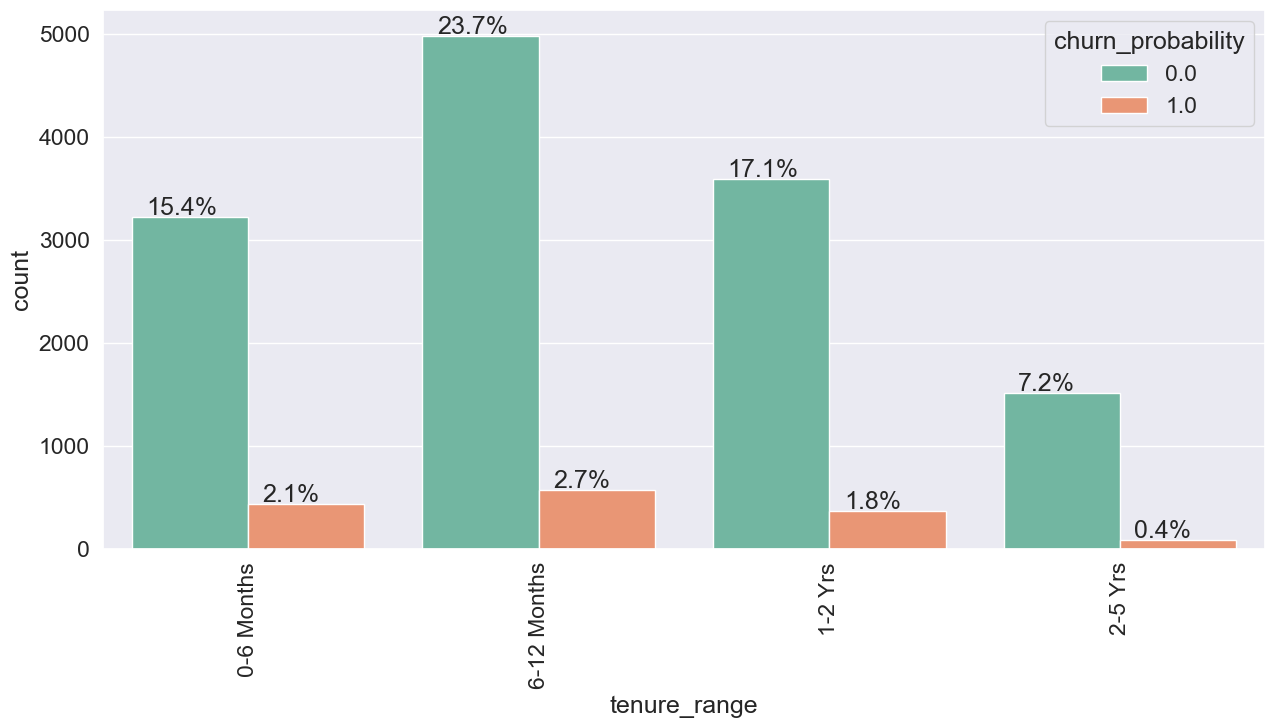

In [236]:
sns.set()
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

temp = pd.Series(data = 'tenure_range')
fig, ax = plt.subplots()
width = len(telecom_filtered['tenure_range'].unique()) + 6 + 4*len(temp.unique())
fig.set_size_inches(width , 7)

total = float(len(telecom_filtered.index))
ax = sns.countplot(x="tenure_range", data=telecom_filtered, palette="Set2", hue = "churn_probability");
for p in ax.patches:
                ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(telecom_filtered))), (p.get_x()+0.05, p.get_height()+20))
plt.xticks(rotation=90)
plt.show()

### By looking at data , information is spread across 3 months - June,July and August. Hence creating new DF for months

In [237]:
def df_info(data) : 
    return pd.DataFrame({
                'Datatype' : data.dtypes.astype(str), 
                'Non_Null_Count': data.count(axis = 0).astype(int), 
                'Null_Count': data.isnull().sum().astype(int), 
                'Null_Percentage': round(data.isnull().sum()/len(data) * 100 , 2), 
                'Unique_Values_Count': data.nunique().astype(int) 
                 }).sort_values(by='Null_Percentage', ascending=False)

In [238]:
#June month
june_columns = []
for column in telecom.columns:
    x = re.search("6$", column)
    if x:
        june_columns.append(column)
# missing_values.loc[sixth_month_columns].sort_values(by='Null_Percentage', ascending=False)
june_info = df_info(telecom)
condition = june_info.index.isin(june_columns)
june_columns = june_info[condition]
june_columns

Datatype  Non_Null_Count  Null_Count  Null_Percentage  \
arpu_6                float64           69999           0              0.0   
total_rech_num_6      float64           69999           0              0.0   
total_rech_amt_6      float64           69999           0              0.0   
max_rech_amt_6        float64           69999           0              0.0   
last_day_rch_amt_6    float64           69999           0              0.0   
total_rech_data_6     float64           69999           0              0.0   
ic_others_6           float64           69999           0              0.0   
isd_ic_mou_6          float64           69999           0              0.0   
spl_ic_mou_6          float64           69999           0              0.0   
total_ic_mou_6        float64           69999           0              0.0   
std_ic_mou_6          float64           69999           0              0.0   
std_ic_t2f_mou_6      float64           69999           0              0.0   
max_rech_data_6       float64           69999           0              0.0   
sachet_3g_6           float64           69999           0              0.0   
tot_data_rech_6       float64           69999           0              0.0   
tot_data_call_rech_6  float64           69999           0              0.0   
monthly_3g_6          float64           69999           0              0.0   
sachet_2g_6           float64           69999           0              0.0   
monthly_2g_6          float64           69999           0              0.0   
vol_3g_mb_6           float64           69999           0              0.0   
vol_2g_mb_6           float64           69999           0              0.0   
av_rech_amt_data_6    float64           69999           0              0.0   
std_ic_t2m_mou_6      float64           69999           0              0.0   
loc_og_t2f_mou_6      float64           69999           0              0.0   
loc_og_t2c_mou_6      float64           69999           0              0.0   
loc_og_mou_6          float64           69999           0              0.0   
std_og_t2t_mou_6      float64           69999           0              0.0   
loc_og_t2m_mou_6      float64           69999           0              0.0   
loc_og_t2t_mou_6      float64           69999           0              0.0   
roam_og_mou_6         float64           69999           0              0.0   
roam_ic_mou_6         float64           69999           0              0.0   
offnet_mou_6          float64           69999           0              0.0   
onnet_mou_6           float64           69999           0              0.0   
std_og_t2m_mou_6      float64           69999           0              0.0   
loc_ic_t2f_mou_6      float64           69999           0              0.0   
loc_ic_t2t_mou_6      float64           69999           0              0.0   
loc_ic_t2m_mou_6      float64           69999           0              0.0   
std_og_t2f_mou_6      float64           69999           0              0.0   
loc_ic_mou_6          float64           69999           0              0.0   
std_ic_t2t_mou_6      float64           69999           0              0.0   
total_og_mou_6        float64           69999           0              0.0   
og_others_6           float64           69999           0              0.0   
spl_og_mou_6          float64           69999           0              0.0   
isd_og_mou_6          float64           69999           0              0.0   
std_og_mou_6          float64           69999           0              0.0   

                      Unique_Values_Count  
arpu_6                              61615  
total_rech_num_6                       94  
total_rech_amt_6                     2108  
max_rech_amt_6                        190  
last_day_rch_amt_6                    179  
total_rech_data_6                      37  
ic_others_6                          4291  
isd_ic_mou_6                         7189  
spl_ic_mou_6                        

In [239]:
#July month
july_columns = []
for column in telecom.columns:
    x = re.search("7$", column)
    if x:
        july_columns.append(column)
# missing_values.loc[sixth_month_columns].sort_values(by='Null_Percentage', ascending=False)
july_info = df_info(telecom)
condition = june_info.index.isin(july_columns)
july_columns = july_info[condition]
july_columns

Datatype  Non_Null_Count  Null_Count  Null_Percentage  \
total_rech_num_7      float64           69999           0              0.0   
total_rech_amt_7      float64           69999           0              0.0   
max_rech_amt_7        float64           69999           0              0.0   
last_day_rch_amt_7    float64           69999           0              0.0   
ic_others_7           float64           69999           0              0.0   
isd_ic_mou_7          float64           69999           0              0.0   
spl_ic_mou_7          float64           69999           0              0.0   
total_ic_mou_7        float64           69999           0              0.0   
std_ic_mou_7          float64           69999           0              0.0   
std_ic_t2f_mou_7      float64           69999           0              0.0   
total_rech_data_7     float64           69999           0              0.0   
std_ic_t2m_mou_7      float64           69999           0              0.0   
monthly_3g_7          float64           69999           0              0.0   
sachet_3g_7           float64           69999           0              0.0   
max_rech_data_7       float64           69999           0              0.0   
tot_data_rech_7       float64           69999           0              0.0   
tot_data_call_rech_7  float64           69999           0              0.0   
sachet_2g_7           float64           69999           0              0.0   
monthly_2g_7          float64           69999           0              0.0   
vol_3g_mb_7           float64           69999           0              0.0   
vol_2g_mb_7           float64           69999           0              0.0   
av_rech_amt_data_7    float64           69999           0              0.0   
arpu_7                float64           69999           0              0.0   
loc_og_t2c_mou_7      float64           69999           0              0.0   
loc_og_t2m_mou_7      float64           69999           0              0.0   
loc_og_t2f_mou_7      float64           69999           0              0.0   
std_og_t2m_mou_7      float64           69999           0              0.0   
loc_og_mou_7          float64           69999           0              0.0   
std_og_t2t_mou_7      float64           69999           0              0.0   
loc_og_t2t_mou_7      float64           69999           0              0.0   
roam_og_mou_7         float64           69999           0              0.0   
roam_ic_mou_7         float64           69999           0              0.0   
offnet_mou_7          float64           69999           0              0.0   
onnet_mou_7           float64           69999           0              0.0   
loc_ic_t2t_mou_7      float64           69999           0              0.0   
loc_ic_t2m_mou_7      float64           69999           0              0.0   
loc_ic_t2f_mou_7      float64           69999           0              0.0   
loc_ic_mou_7          float64           69999           0              0.0   
std_ic_t2t_mou_7      float64           69999           0              0.0   
total_og_mou_7        float64           69999           0              0.0   
og_others_7           float64           69999           0              0.0   
spl_og_mou_7          float64           69999           0              0.0   
isd_og_mou_7          float64           69999           0              0.0   
std_og_mou_7          float64           69999           0              0.0   
std_og_t2f_mou_7      float64           69999           0              0.0   
av_tot_data_call_6_7  float64           69999           0              0.0   

                      Unique_Values_Count  
total_rech_num_7                       96  
total_rech_amt_7                     2147  
max_rech_amt_7                        178  
last_day_rch_amt_7                    166  
ic_others_7                          4345  
isd_ic_mou_7                         7327  
spl_ic_mou_7                         2790  
to

In [240]:
#August month
aug_columns = []
for column in telecom.columns:
    x = re.search("8$", column)
    if x:
        aug_columns.append(column)
# missing_values.loc[sixth_month_columns].sort_values(by='Null_Percentage', ascending=False)
aug_info = df_info(telecom)
condition = aug_info.index.isin(aug_columns)
aug_columns = july_info[condition]
aug_columns

Datatype  Non_Null_Count  Null_Count  Null_Percentage  \
total_rech_amt_8    float64           69999           0              0.0   
ic_others_8         float64           69999           0              0.0   
total_rech_num_8    float64           69999           0              0.0   
total_rech_data_8   float64           69999           0              0.0   
max_rech_amt_8      float64           69999           0              0.0   
last_day_rch_amt_8  float64           69999           0              0.0   
isd_ic_mou_8        float64           69999           0              0.0   
spl_ic_mou_8        float64           69999           0              0.0   
total_ic_mou_8      float64           69999           0              0.0   
std_ic_mou_8        float64           69999           0              0.0   
std_ic_t2f_mou_8    float64           69999           0              0.0   
monthly_3g_8        float64           69999           0              0.0   
sachet_3g_8         float64           69999           0              0.0   
sachet_2g_8         float64           69999           0              0.0   
monthly_2g_8        float64           69999           0              0.0   
vol_3g_mb_8         float64           69999           0              0.0   
vol_2g_mb_8         float64           69999           0              0.0   
av_rech_amt_data_8  float64           69999           0              0.0   
max_rech_data_8     float64           69999           0              0.0   
std_ic_t2m_mou_8    float64           69999           0              0.0   
loc_og_t2m_mou_8    float64           69999           0              0.0   
loc_og_t2f_mou_8    float64           69999           0              0.0   
loc_og_t2c_mou_8    float64           69999           0              0.0   
loc_og_mou_8        float64           69999           0              0.0   
std_og_t2t_mou_8    float64           69999           0              0.0   
loc_og_t2t_mou_8    float64           69999           0              0.0   
roam_og_mou_8       float64           69999           0              0.0   
roam_ic_mou_8       float64           69999           0              0.0   
offnet_mou_8        float64           69999           0              0.0   
onnet_mou_8         float64           69999           0              0.0   
arpu_8              float64           69999           0              0.0   
std_og_t2m_mou_8    float64           69999           0              0.0   
std_ic_t2t_mou_8    float64           69999           0              0.0   
loc_ic_t2t_mou_8    float64           69999           0              0.0   
loc_ic_t2m_mou_8    float64           69999           0              0.0   
loc_ic_t2f_mou_8    float64           69999           0              0.0   
loc_ic_mou_8        float64           69999           0              0.0   
total_og_mou_8      float64           69999           0              0.0   
og_others_8         float64           69999           0              0.0   
spl_og_mou_8        float64           69999           0              0.0   
isd_og_mou_8        float64           69999           0              0.0   
std_og_mou_8        float64           69999           0              0.0   
std_og_t2f_mou_8    float64           69999           0              0.0   

                    Unique_Values_Count  
total_rech_amt_8                   2149  
ic_others_8                        5268  
total_rech_num_8                     92  
total_rech_data_8                    45  
max_rech_amt_8                      202  
last_day_rch_amt_8                  191  
isd_ic_mou_8                       8397  
spl_ic_mou_8                       3798  
total_ic_mou_8                    27318  
std_ic_mou_8                      13642  
std_ic_t2f_mou_8                   6286  
monthly_3g_8                         12  
sachet_3g_8                          28  
sachet_2g_8                          32  
monthly_2g_8                          6  
vo

In [387]:
new_telecom_df = telecom_filtered[:].copy()
new_telecom_df.shape

(21013, 158)

In [388]:
X = new_telecom_df.drop(['churn_probability'], axis=1)
y = new_telecom_df['churn_probability']

new_telecom_df.drop('churn_probability', axis=1, inplace=True)

In [389]:
new_telecom_df.shape

(21013, 157)

In [390]:
X.drop('tenure_range', axis=1, inplace=True)

In [391]:
numeric_col = list(X.dtypes[X.dtypes != 'object'].index)

In [392]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [393]:
scaler = StandardScaler().fit(X)
X[numeric_col] = scaler.fit_transform(X[numeric_col])


In [394]:
X

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0     -0.670168 -0.870069 -0.779508    -0.514040    -0.536341    -0.478384   
1      0.046590 -0.366660 -0.324222    -0.537336    -0.494967    -0.075608   
2      1.207436  0.700795 -0.052121     1.285793     0.218647    -0.489593   
3     -0.393315 -0.417637 -0.512392    -0.359661    -0.467672    -0.427625   
4     -0.354265 -0.419828 -0.164561    -0.541308    -0.522693    -0.464374   
...         ...       ...       ...          ...          ...          ...   
21008  1.155093  2.123246  2.268594    -0.377418    -0.272399    -0.110581   
21009 -0.762996 -0.525601 -0.604728    -0.557476    -0.546253    -0.479026   
21010 -0.681102 -0.733776 -0.725592    -0.462938    -0.352704    -0.473657   
21011 -1.144606 -0.298698 -0.341820    -0.559731    -0.531148    -0.468117   
21012 -0.674667 -0.633175 -0.695850    -0.529649    -0.530574    -0.477144   

       offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  ...  \
0         -0.671615     -0.696830     -0.699306       0.476518  ...   
1         -0.129267     -0.077717     -0.303605      -0.215693  ...   
2         -0.178577      0.143115      0.097077      -0.215693  ...   
3          0.317087      0.260646     -0.250961      -0.215693  ...   
4         -0.512801     -0.450922     -0.333706      -0.215693  ...   
...             ...           ...           ...            ...  ...   
21008      0.927301      0.542252      0.764697      -0.215693  ...   
21009     -0.697156     -0.708960     -0.654345      -0.215693  ...   
21010     -0.557941     -0.292148     -0.526406      -0.215693  ...   
21011     -0.790438      0.221299      0.085952      -0.022638  ...   
21012     -0.727180     -0.740519     -0.693121       0.107700  ...   

       spl_ic_mou_diff  total_ic_mou_diff  total_rech_num_diff  \
0             0.115439           0.118231            -0.253931   
1             0.115439           0.631626             0.275915   
2             0.109506          -1.411092            -1.616394   
3             0.115439           0.059542             0.730070   
4             0.115439           0.179056            -0.708086   
...                ...                ...                  ...   
21008         0.115439           0.104225             0.124531   
21009         0.106767           0.037614            -0.026854   
21010         0.115439          -0.390663            -0.329624   
21011         0.115439           0.787350             0.881454   
21012         0.115439           0.060208            -0.026854   

       total_rech_amt_diff  max_rech_amt_diff  total_rech_data_diff  \
0                -0.033467          -0.038251             -0.393872   
1                 0.482092           0.078530              0.291641   
2                -1.513313           0.334694              0.063137   
3                -0.278119          -0.524210             -0.165367   
4                -0.576475          -0.019415              0.063137   
...                    ...                ...                   ...   
21008             1.501276           3.284351             -0.622376   
21009            -0.081204          -0.026950             -0.622376   
21010            -0.034661           0.074763             -2.450412   
21011             0.872341           0.455242             -1.079385   
21012            -0.223222          -0.531744              0.063137   

       max_rech_data_diff  av_rech_amt_data_diff  vol_2g_mb_diff  \
0               -0.018856              -0.186137       -0.454521   
1                1.073733               0.610826        0.945581   
2                0.083976               0.090774        0.075108   
3                0.083976               0.013104        0.075030   
4                0.225370              -0.182760       -0.076043   
...                   ...                    ...             ...   
21008           -0.892927              -1.425481        0.073709   
21009            0.083976    

In [395]:
# Split in train & Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=1)

In [396]:
print("X_train Shape : ", X_train.shape)
print("X_test Shape : ", X_test.shape)

y_train_imb = (y_train != 0).sum()/(y_train == 0).sum()
y_test_imb = (y_test != 0).sum()/(y_test == 0).sum()
print("Imbalance in Train Data : ", y_train_imb)
print("Imbalance in Test Data : ", y_test_imb)

X_train Shape :  (14709, 156)
X_test Shape :  (6304, 156)
Imbalance in Train Data :  0.09393128067826863
Imbalance in Test Data :  0.08167467398764584


In [397]:
print('Before upsampling count of label 0 {}'.format(sum(y_train==0)))
print('Before upsampling count of label 1 {}'.format(sum(y_train==1)))

Before upsampling count of label 0 13446
Before upsampling count of label 1 1263


In [398]:
#Upsampling - Applying Smote to balance the data
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

sm = SMOTE()
X_tr,y_tr = sm.fit_resample(X_train,y_train)
print(X_tr.shape)
print(y_tr.shape)

(26892, 156)
(26892,)


In [399]:
X

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0     -0.670168 -0.870069 -0.779508    -0.514040    -0.536341    -0.478384   
1      0.046590 -0.366660 -0.324222    -0.537336    -0.494967    -0.075608   
2      1.207436  0.700795 -0.052121     1.285793     0.218647    -0.489593   
3     -0.393315 -0.417637 -0.512392    -0.359661    -0.467672    -0.427625   
4     -0.354265 -0.419828 -0.164561    -0.541308    -0.522693    -0.464374   
...         ...       ...       ...          ...          ...          ...   
21008  1.155093  2.123246  2.268594    -0.377418    -0.272399    -0.110581   
21009 -0.762996 -0.525601 -0.604728    -0.557476    -0.546253    -0.479026   
21010 -0.681102 -0.733776 -0.725592    -0.462938    -0.352704    -0.473657   
21011 -1.144606 -0.298698 -0.341820    -0.559731    -0.531148    -0.468117   
21012 -0.674667 -0.633175 -0.695850    -0.529649    -0.530574    -0.477144   

       offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  ...  \
0         -0.671615     -0.696830     -0.699306       0.476518  ...   
1         -0.129267     -0.077717     -0.303605      -0.215693  ...   
2         -0.178577      0.143115      0.097077      -0.215693  ...   
3          0.317087      0.260646     -0.250961      -0.215693  ...   
4         -0.512801     -0.450922     -0.333706      -0.215693  ...   
...             ...           ...           ...            ...  ...   
21008      0.927301      0.542252      0.764697      -0.215693  ...   
21009     -0.697156     -0.708960     -0.654345      -0.215693  ...   
21010     -0.557941     -0.292148     -0.526406      -0.215693  ...   
21011     -0.790438      0.221299      0.085952      -0.022638  ...   
21012     -0.727180     -0.740519     -0.693121       0.107700  ...   

       spl_ic_mou_diff  total_ic_mou_diff  total_rech_num_diff  \
0             0.115439           0.118231            -0.253931   
1             0.115439           0.631626             0.275915   
2             0.109506          -1.411092            -1.616394   
3             0.115439           0.059542             0.730070   
4             0.115439           0.179056            -0.708086   
...                ...                ...                  ...   
21008         0.115439           0.104225             0.124531   
21009         0.106767           0.037614            -0.026854   
21010         0.115439          -0.390663            -0.329624   
21011         0.115439           0.787350             0.881454   
21012         0.115439           0.060208            -0.026854   

       total_rech_amt_diff  max_rech_amt_diff  total_rech_data_diff  \
0                -0.033467          -0.038251             -0.393872   
1                 0.482092           0.078530              0.291641   
2                -1.513313           0.334694              0.063137   
3                -0.278119          -0.524210             -0.165367   
4                -0.576475          -0.019415              0.063137   
...                    ...                ...                   ...   
21008             1.501276           3.284351             -0.622376   
21009            -0.081204          -0.026950             -0.622376   
21010            -0.034661           0.074763             -2.450412   
21011             0.872341           0.455242             -1.079385   
21012            -0.223222          -0.531744              0.063137   

       max_rech_data_diff  av_rech_amt_data_diff  vol_2g_mb_diff  \
0               -0.018856              -0.186137       -0.454521   
1                1.073733               0.610826        0.945581   
2                0.083976               0.090774        0.075108   
3                0.083976               0.013104        0.075030   
4                0.225370              -0.182760       -0.076043   
...                   ...                    ...             ...   
21008           -0.892927              -1.425481        0.073709   
21009            0.083976    

In [400]:
print("y_tr Shape", y_tr.shape)

imb = (y_tr != 0).sum()/(y_tr == 0).sum()
print("Imbalance in Train Data : ",imb)

y_tr Shape (26892,)
Imbalance in Train Data :  1.0


In [401]:
print('After upsampling count of label 0 {}'.format(sum(y_tr==0)))
print('After upsampling count of label 1 {}'.format(sum(y_tr==1)))

After upsampling count of label 0 13446
After upsampling count of label 1 13446


# PCA

In [402]:
from sklearn.decomposition import PCA

In [403]:
pca = PCA(random_state=100)

#Doing the PCA on the train data
pca.fit(X_tr)

PCA(random_state=100)

In [404]:
X_tr_pca = pca.fit_transform(X_tr)
print(X_tr_pca.shape)

X_test_pca = pca.transform(X_test)
print(X_test_pca.shape)

(26892, 156)
(6304, 156)


In [405]:
pca.explained_variance_ratio_

array([1.05050337e-01, 9.37330579e-02, 6.25501925e-02, 4.80729494e-02,
       4.13463247e-02, 4.04237213e-02, 3.53966325e-02, 3.18627485e-02,
       2.98318990e-02, 2.71239881e-02, 2.41600350e-02, 2.27052009e-02,
       1.97483913e-02, 1.74617584e-02, 1.60051152e-02, 1.51538409e-02,
       1.42996780e-02, 1.39314416e-02, 1.34799293e-02, 1.33379336e-02,
       1.22004607e-02, 1.09591062e-02, 1.05039739e-02, 1.04247295e-02,
       1.01612829e-02, 9.99482765e-03, 9.34284217e-03, 8.79651180e-03,
       8.71448548e-03, 8.33195278e-03, 8.10734075e-03, 7.76431175e-03,
       7.62700115e-03, 7.54794911e-03, 7.44204984e-03, 6.85414595e-03,
       6.65056354e-03, 6.62088354e-03, 6.30614948e-03, 6.05404442e-03,
       5.92543359e-03, 5.53431416e-03, 5.49635285e-03, 5.34582621e-03,
       5.27234898e-03, 5.11707904e-03, 4.88939641e-03, 4.58267596e-03,
       4.42966378e-03, 4.29347005e-03, 4.08430359e-03, 4.00417749e-03,
       3.91720153e-03, 3.76480511e-03, 3.59654733e-03, 3.32592459e-03,
      

In [406]:
import matplotlib.pyplot as plt

<BarContainer object of 156 artists>

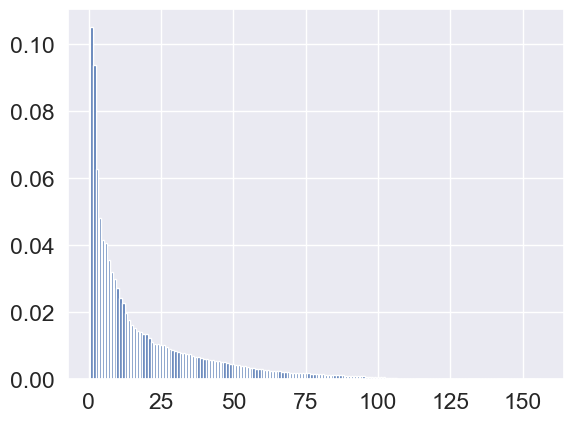

In [407]:
plt.bar(range(1,len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)

#### Making the scree plot

In [408]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

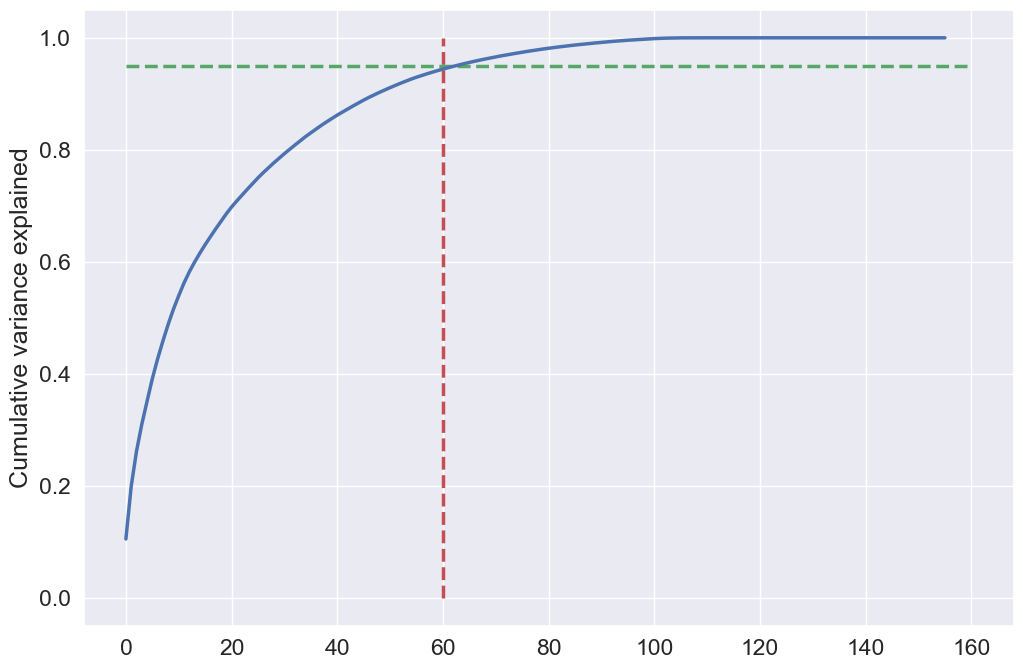

In [409]:
fig = plt.figure(figsize=[12,8])
plt.vlines(x=60, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=160, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

Perform PCA with **60 components**

#### Making it a little more unsupervised 

In [410]:
pca_again = PCA(0.90)

In [411]:
df_train_pca2 = pca_again.fit_transform(X_tr)
df_test_pca2 = pca_again.transform(X_test)

In [412]:
df_train_pca2.shape

(26892, 49)

In [413]:
corrmat = np.corrcoef(df_train_pca2.transpose())

In [414]:
corrmat.shape

(49, 49)

<AxesSubplot: >

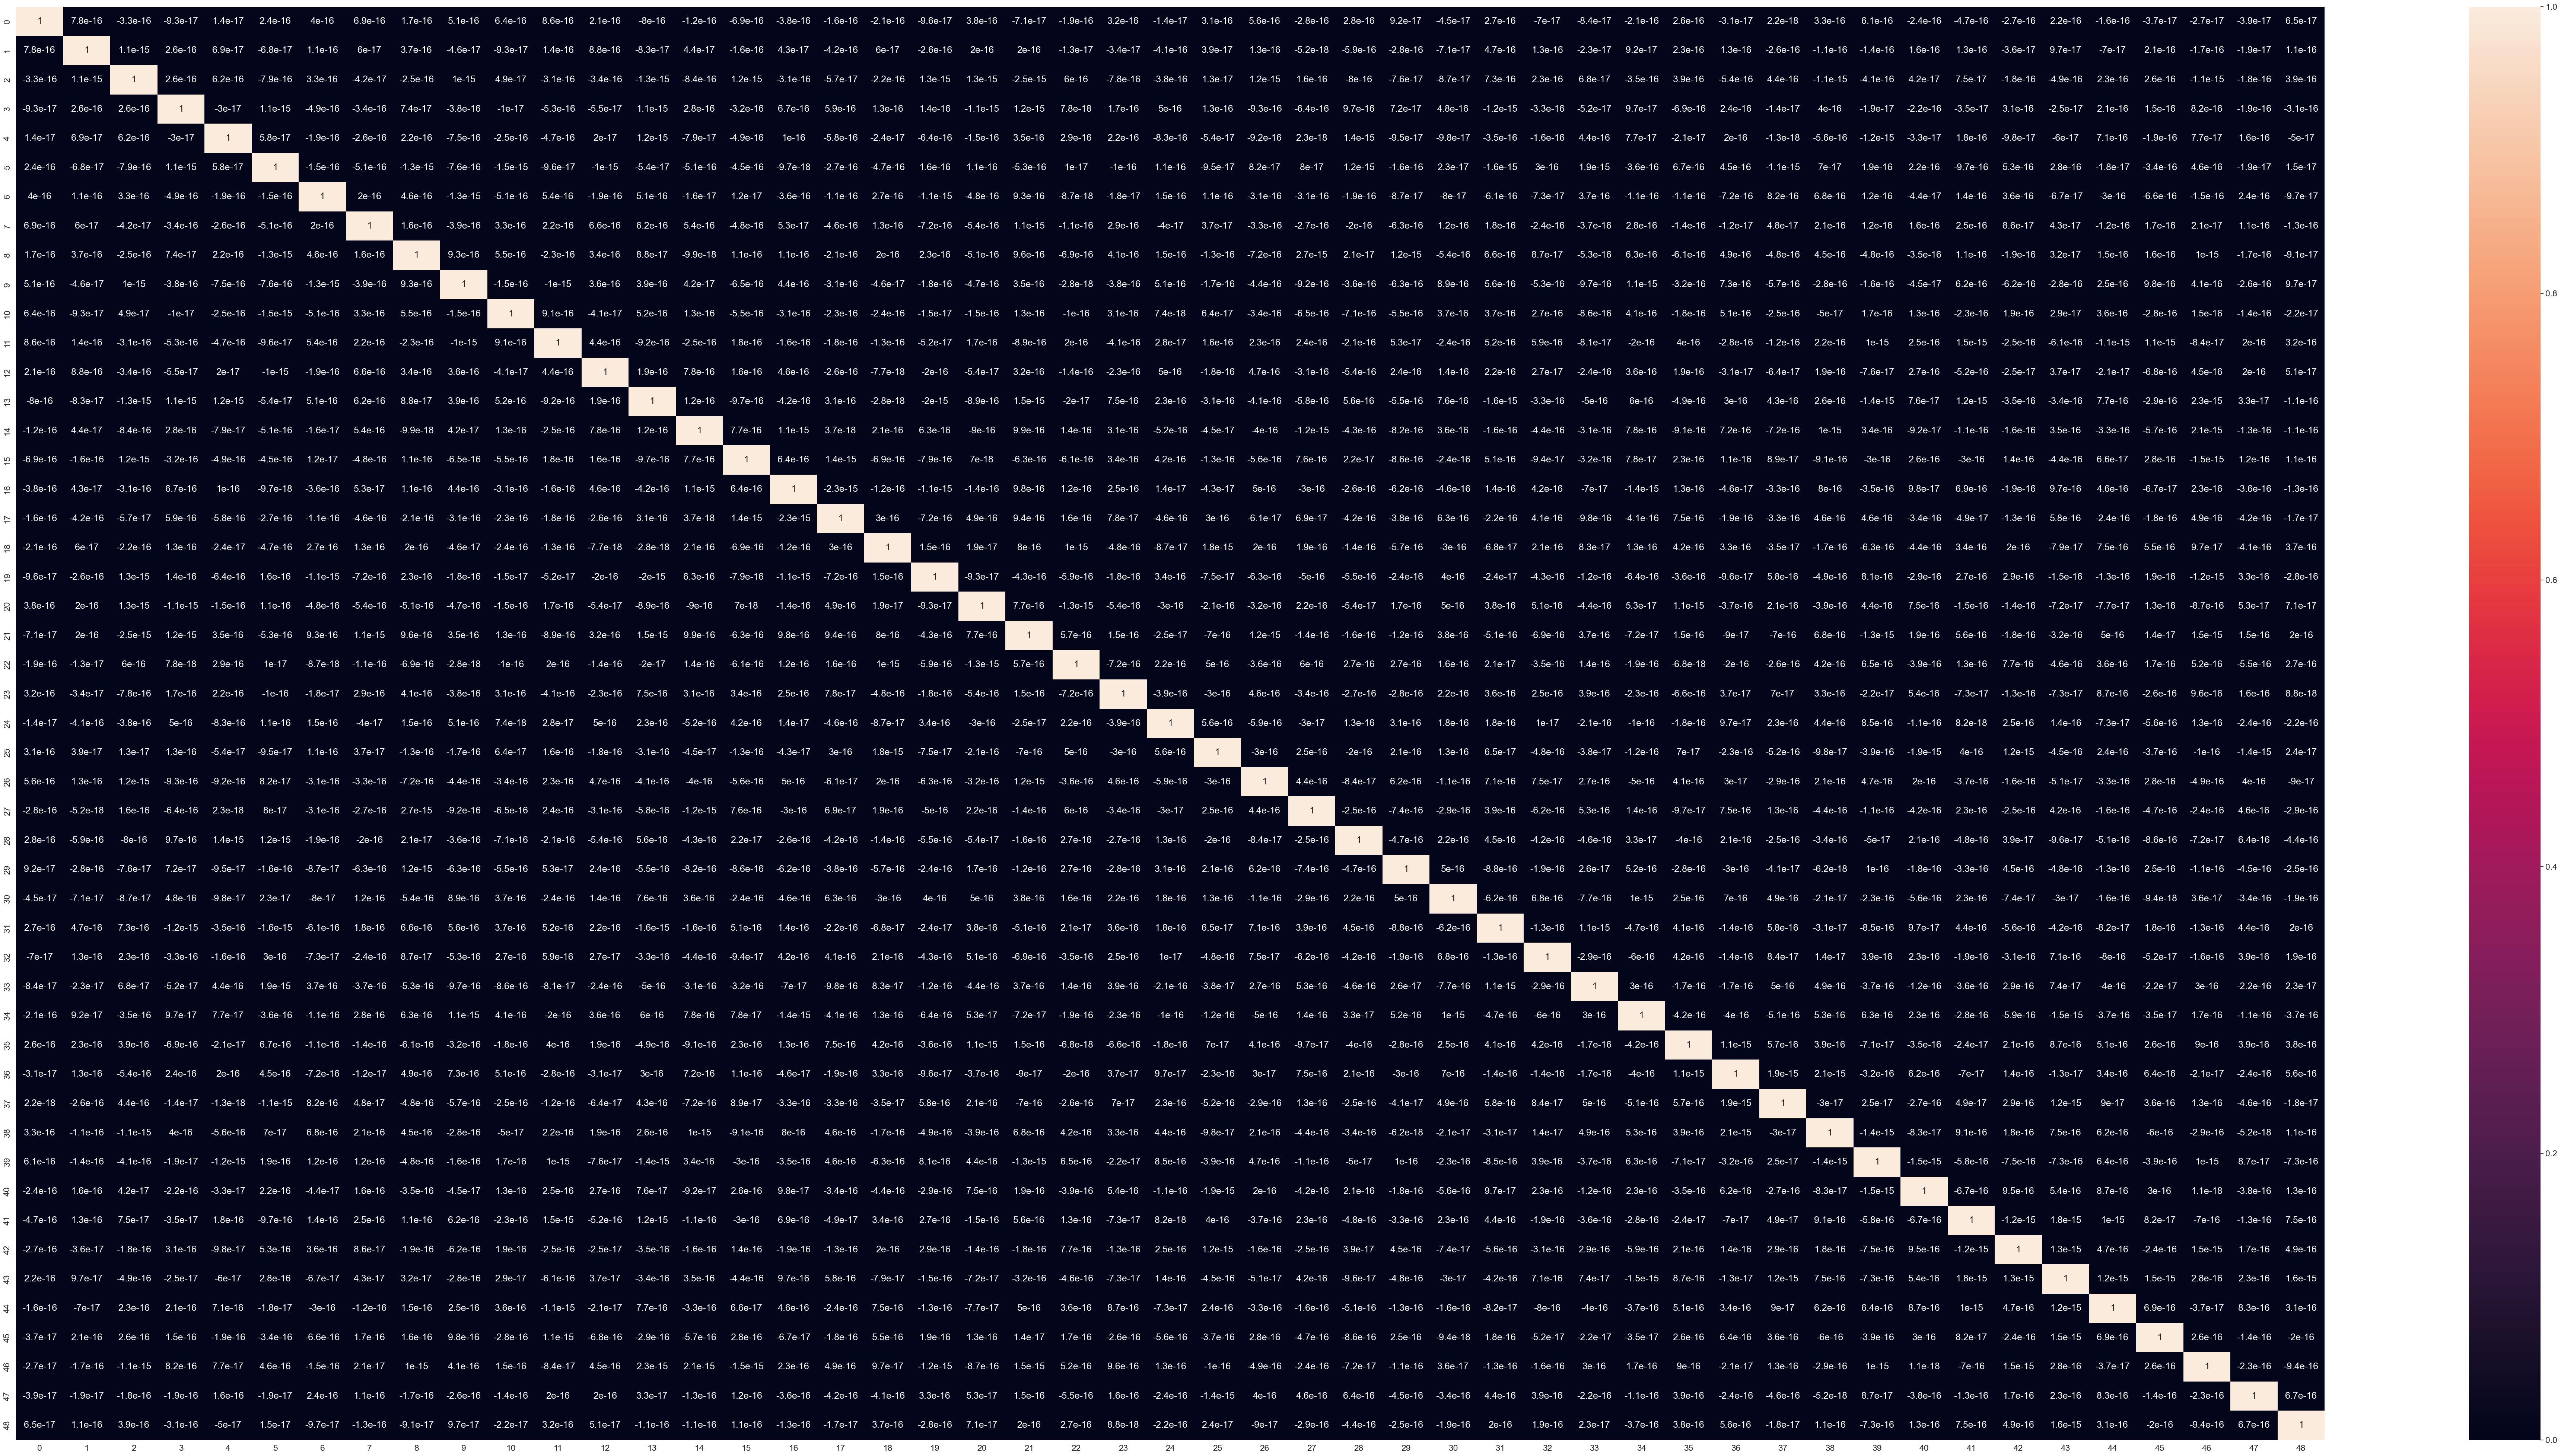

In [449]:
plt.figure(figsize=[100,50])
sns.heatmap(corrmat, annot=True)

## Logistic Regression with PCA selected features

In [450]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=100, class_weight='balanced')
lr_model_pca = lr.fit(df_train_pca2,y_tr)

Making predictions on test set

In [451]:
#Train set Prediction
y_train_pred_prob = lr_model_pca.predict_proba(df_train_pca2)
y_train_pred = lr_model_pca.predict(df_train_pca2)

#Test set Prediction
y_test_pred_prob = lr_model_pca.predict_proba(df_test_pca2)
y_test_pred = lr_model_pca.predict(df_test_pca2)

In [452]:
#Calculate the accuracy score
from sklearn import metrics
metrics.roc_auc_score(y_test,y_test_pred_prob[:,1])

0.8832447529457905

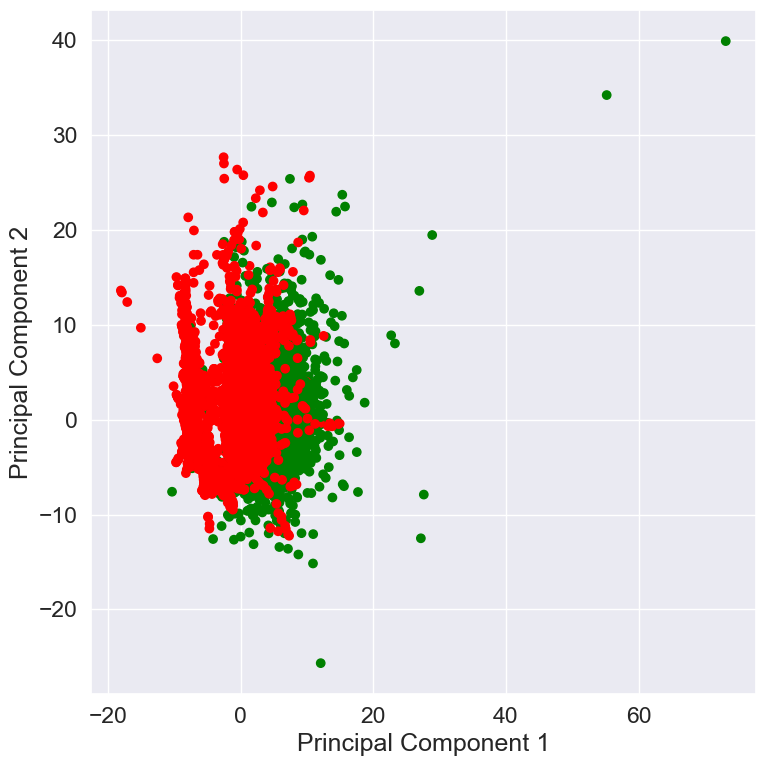

In [453]:
# Let's also visualize the data to see if we can spot any patterns
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(df_train_pca2[:,0], df_train_pca2[:,1], c = y_tr.map({0:'green',1:'red'}))
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.tight_layout()
plt.show()

With selected feature model is giving good accuracy score

### Confusion matrix

In [454]:
#y_train_pred = y_train_pred.val

#Creating dataframe with actual probability and predicted probability
#y_train_pred_final = pd.DataFrame({'Actual Churn':y_train_tr,'Pred Chrun':y_train_pred})
#y_train_pred_final = pd.DataFrame({'Actual Churn':y_test,'Pred Chrun':y_test_pred})

In [455]:
from sklearn.metrics import confusion_matrix
train_matrix = confusion_matrix(y_tr, y_train_pred)
print('Confusion Matrix for train:\n', train_matrix)
test_matrix = confusion_matrix(y_test, y_test_pred)
print('\nConfusion Matrix for test: \n', test_matrix)

Confusion Matrix for train:
 [[11481  1965]
 [ 1934 11512]]

Confusion Matrix for test: 
 [[4959  869]
 [  95  381]]


In [456]:
# Function for Baseline Performance Metrics
import math
def model_metrics(matrix) :
    TN = matrix[0][0]
    TP = matrix[1][1]
    FP = matrix[0][1]
    FN = matrix[1][0]
    accuracy = round((TP + TN)/float(TP+TN+FP+FN),3)
    print('Accuracy :' ,accuracy )
    sensitivity = round(TP/float(FN + TP),3)
    print('Sensitivity / True Positive Rate / Recall :', sensitivity)
    specificity = round(TN/float(TN + FP),3)
    print('Specificity / True Negative Rate : ', specificity)
    precision = round(TP/float(TP + FP),3)
    print('Precision / Positive Predictive Value :', precision)
    print('F1-score :', round(2*precision*sensitivity/(precision + sensitivity),3))

In [457]:
# Baseline Model Performance : 

print('Train Performance : \n')
model_metrics(train_matrix)

print('\n\nTest Performance : \n')
model_metrics(test_matrix)

Train Performance : 

Accuracy : 0.855
Sensitivity / True Positive Rate / Recall : 0.856
Specificity / True Negative Rate :  0.854
Precision / Positive Predictive Value : 0.854
F1-score : 0.855


Test Performance : 

Accuracy : 0.847
Sensitivity / True Positive Rate / Recall : 0.8
Specificity / True Negative Rate :  0.851
Precision / Positive Predictive Value : 0.305
F1-score : 0.442


## Hyper parameter tuning for logistic regression

In [458]:
logModel = LogisticRegression()

In [459]:
param_grid = [    
    {'C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'penalty': ['l1', 'l2']
    }
]

In [460]:
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(logModel, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1,scoring='roc_auc')

In [461]:
best_clf = clf.fit(df_train_pca2,y_tr)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


In [462]:
best_clf.best_estimator_

LogisticRegression(C=0.1)

### Building model again with parameters choosen from tuning

In [463]:
lr = LogisticRegression(C=0.5,random_state=100, class_weight='balanced')
lr_model_pca = lr.fit(df_train_pca2,y_tr)

In [464]:
#Train set Prediction
y_train_pred_prob = lr_model_pca.predict_proba(df_train_pca2)
y_train_pred = lr_model_pca.predict(df_train_pca2)

#Test set Prediction
y_test_pred_prob = lr_model_pca.predict_proba(df_test_pca2)
y_test_pred = lr_model_pca.predict(df_test_pca2)

In [465]:
#Calculate the accuracy score
from sklearn import metrics
metrics.roc_auc_score(y_test,y_test_pred_prob[:,1])

0.8833510926676779

In [466]:

conf_matrix_train = confusion_matrix(y_tr,y_train_pred)
print('\nConfusion Matrix for train: \n', conf_matrix_train)
conf_test_matrix = confusion_matrix(y_test, y_test_pred)
print('\nConfusion Matrix for test: \n', conf_test_matrix)


Confusion Matrix for train: 
 [[11482  1964]
 [ 1929 11517]]

Confusion Matrix for test: 
 [[4961  867]
 [  95  381]]


In [467]:
# Model Performance : 

print('Train Performance : \n')
model_metrics(conf_matrix_train)

print('\n\nTest Performance : \n')
model_metrics(test_matrix)

Train Performance : 

Accuracy : 0.855
Sensitivity / True Positive Rate / Recall : 0.857
Specificity / True Negative Rate :  0.854
Precision / Positive Predictive Value : 0.854
F1-score : 0.855


Test Performance : 

Accuracy : 0.847
Sensitivity / True Positive Rate / Recall : 0.8
Specificity / True Negative Rate :  0.851
Precision / Positive Predictive Value : 0.305
F1-score : 0.442


# Finding the best features

## Using DT

In [468]:
from sklearn.tree import DecisionTreeClassifier


dt = DecisionTreeClassifier(random_state=42)

In [469]:
# Hyperparameter tuninig for Decision Tree classifier model

dtparams = { 
          'max_depth': [3,5,10],
          'min_samples_leaf': [50,100,200,500],
          'min_samples_split': [50,75,100],
          'criterion':['gini','entropy'],
          'max_features': ['auto','sqrt','log2']}

model_decisiontree = GridSearchCV(estimator=dt, param_grid=dtparams, cv=4, n_jobs=-1,verbose=1,scoring="recall")

In [470]:
%%time

# Fit the model on the training dataset

model_decisiontree.fit(X_tr,y_tr)

Fitting 4 folds for each of 216 candidates, totalling 864 fits


/Users/I329369/Library/Python/3.10/lib/python/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/I329369/Library/Python/3.10/lib/python/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/I329369/Library/Python/3.10/lib/python/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/I329369/Library/Python/3.10/lib/python/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behavi

CPU times: user 941 ms, sys: 222 ms, total: 1.16 s
Wall time: 13.3 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [50, 100, 200, 500],
                         'min_samples_split': [50, 75, 100]},
             scoring='recall', verbose=1)

In [471]:
# Best estimator values for Decision Tree classifier model

model_decisiontree.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=10, max_features='auto',
                       min_samples_leaf=50, min_samples_split=50,
                       random_state=42)

In [472]:
# DecisionTree model with best hyper parameter value

model_decisiontreebest = model_decisiontree.best_estimator_

# Predicting the target variable

y_test_dtpred = model_decisiontreebest.predict(X_test)

In [473]:
# Accuracy on train data set.

metrics.accuracy_score(y_test,y_test_dtpred)

0.8656408629441624

In [474]:
# Confusion Matrix

metrics.confusion_matrix(y_test,y_test_dtpred)

array([[5114,  714],
       [ 133,  343]])

In [475]:
# Classification report for the Decision Tree Classifier model.

print(metrics.classification_report(y_test,y_test_dtpred))

              precision    recall  f1-score   support

         0.0       0.97      0.88      0.92      5828
         1.0       0.32      0.72      0.45       476

    accuracy                           0.87      6304
   macro avg       0.65      0.80      0.69      6304
weighted avg       0.93      0.87      0.89      6304



In [476]:
# Calculating Recall metric
from sklearn.metrics import precision_score, recall_score

print(recall_score(y_test,y_test_dtpred))

# Printing AUC Score 

print ("AUC Score (Train): %f" % metrics.roc_auc_score(y_test, y_test_dtpred))

0.7205882352941176
AUC Score (Train): 0.799038


In [478]:
# Series that contains top important features.

feature_scores = pd.Series(model_decisiontreebest.feature_importances_, index=pd.DataFrame(X_tr).columns).sort_values(ascending=False).nlargest(23)
feature_scores

roam_og_mou_8            0.441952
total_rech_data_diff     0.087641
loc_ic_t2m_mou_8         0.058727
max_rech_data_diff       0.040628
roam_ic_mou_8            0.035663
total_ic_mou_8           0.028691
offnet_mou_diff          0.023440
total_ic_mou_diff        0.022013
last_day_rch_amt_8       0.020466
isd_og_mou_8             0.019374
max_rech_amt_8           0.012632
vol_2g_mb_diff           0.010589
max_rech_data_6          0.009006
total_rech_data_6        0.008754
loc_ic_t2t_mou_6         0.008404
max_rech_data_8          0.006571
loc_og_t2c_mou_6         0.006453
onnet_mou_diff           0.006313
av_rech_amt_data_diff    0.006114
av_rech_amt_data_8       0.006104
std_og_mou_8             0.005811
roam_ic_mou_diff         0.005477
max_rech_amt_6           0.004855
dtype: float64

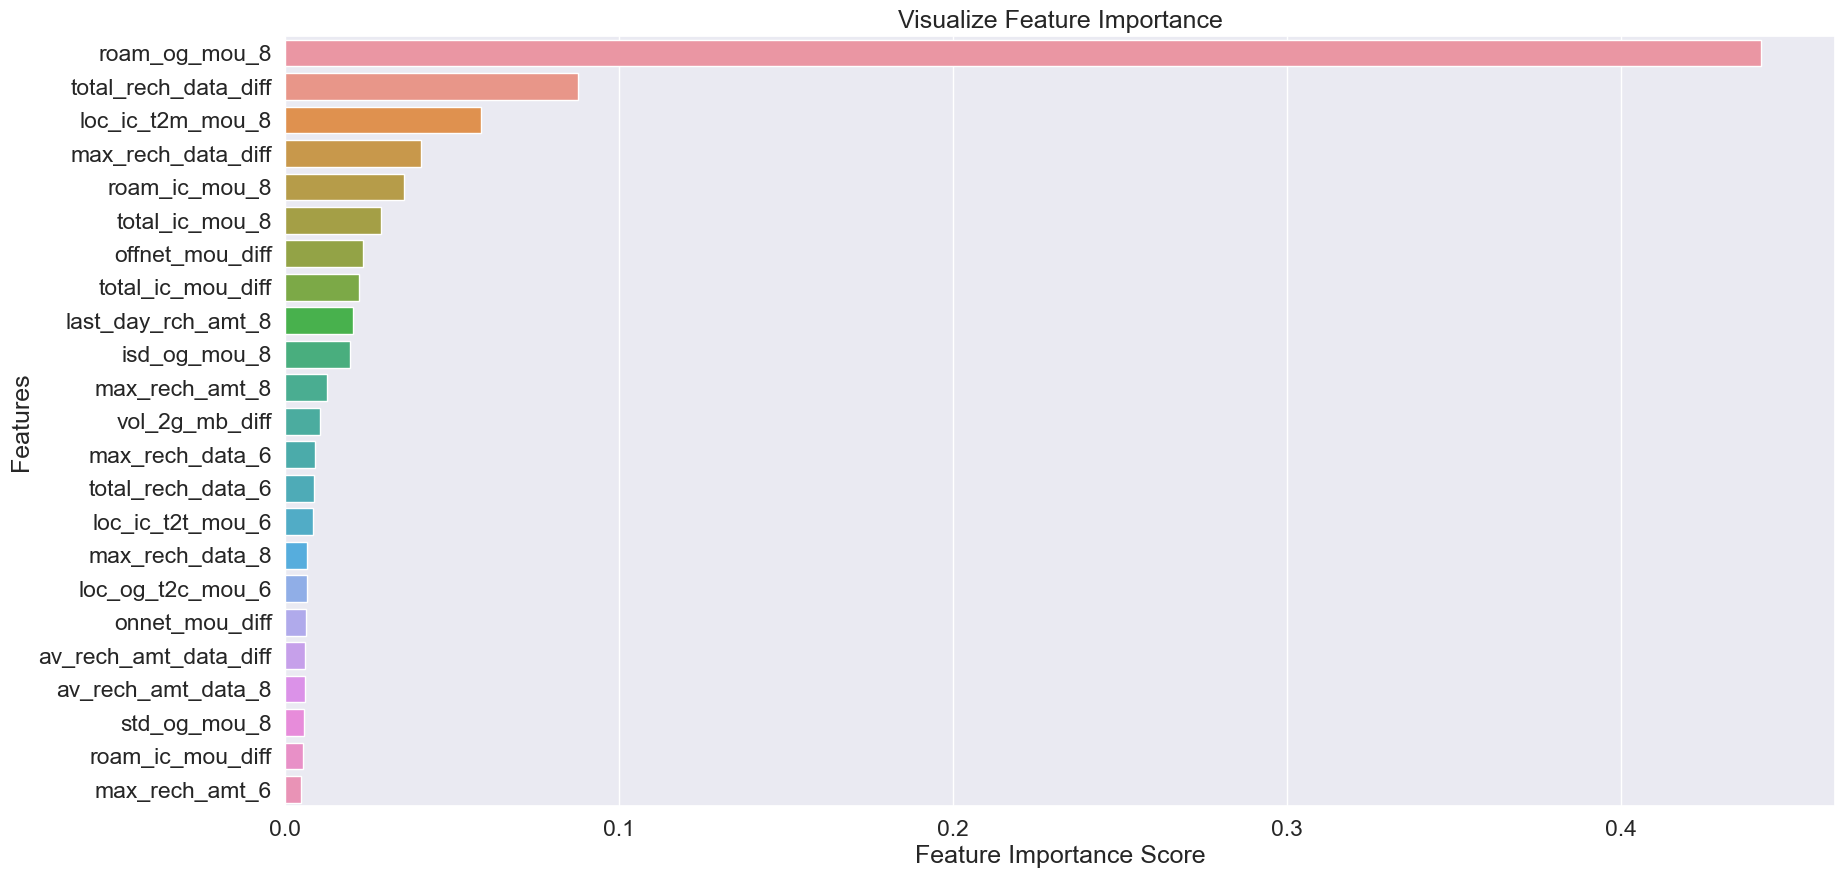

In [482]:
# Visualize top features.

ax = plt.subplots(figsize=(20,10))
ax = sns.barplot(x=feature_scores,y=feature_scores.index)
ax.set_title("Visualize Feature Importance")
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel("Feature Importance Score")
ax.set_ylabel("Features")
plt.show()

### Decision Tree Gives AUC of 0.799 and Recall of 72%

### Top Features
roam_og_mou_8            
total_rech_data_diff     
loc_ic_t2m_mou_8         
max_rech_data_diff       
roam_ic_mou_8            
total_ic_mou_8           
offnet_mou_diff          
total_ic_mou_diff        
last_day_rch_amt_8       
isd_og_mou_8             
max_rech_amt_8           
vol_2g_mb_diff           
max_rech_data_6          
total_rech_data_6        
loc_ic_t2t_mou_6         
max_rech_data_8          
loc_og_t2c_mou_6         
onnet_mou_diff           
av_rech_amt_data_diff    
av_rech_amt_data_8       
std_og_mou_8             
roam_ic_mou_diff         
max_rech_amt_6           

## Finding features using RFE

In [495]:
# Applying RFE on training set to find out important features
from sklearn.feature_selection import RFE

logreg = LogisticRegression()
rfe = RFE(logreg, n_features_to_select=25)
rfe = rfe.fit(X_tr, y_tr)


In [496]:
# Checking the list of the columns selected

list(zip(X_tr.columns, rfe.support_, rfe.ranking_))

[('arpu_6', False, 24),
 ('arpu_7', True, 1),
 ('arpu_8', False, 3),
 ('onnet_mou_6', False, 125),
 ('onnet_mou_7', False, 39),
 ('onnet_mou_8', False, 70),
 ('offnet_mou_6', True, 1),
 ('offnet_mou_7', False, 47),
 ('offnet_mou_8', False, 11),
 ('roam_ic_mou_6', False, 111),
 ('roam_ic_mou_7', False, 83),
 ('roam_ic_mou_8', False, 132),
 ('roam_og_mou_6', True, 1),
 ('roam_og_mou_7', False, 13),
 ('roam_og_mou_8', False, 40),
 ('loc_og_t2t_mou_6', False, 126),
 ('loc_og_t2t_mou_7', False, 22),
 ('loc_og_t2t_mou_8', False, 74),
 ('loc_og_t2m_mou_6', False, 53),
 ('loc_og_t2m_mou_7', False, 130),
 ('loc_og_t2m_mou_8', False, 12),
 ('loc_og_t2f_mou_6', False, 110),
 ('loc_og_t2f_mou_7', False, 124),
 ('loc_og_t2f_mou_8', False, 87),
 ('loc_og_t2c_mou_6', False, 52),
 ('loc_og_t2c_mou_7', False, 103),
 ('loc_og_t2c_mou_8', False, 51),
 ('loc_og_mou_6', False, 49),
 ('loc_og_mou_7', False, 86),
 ('loc_og_mou_8', True, 1),
 ('std_og_t2t_mou_6', False, 21),
 ('std_og_t2t_mou_7', False, 23),


In [497]:
# Filtering the X train columns selected by the RFE

col = X_tr.columns[rfe.support_]

In [498]:
for i in X_tr.columns:
    print(i)

arpu_6
arpu_7
arpu_8
onnet_mou_6
onnet_mou_7
onnet_mou_8
offnet_mou_6
offnet_mou_7
offnet_mou_8
roam_ic_mou_6
roam_ic_mou_7
roam_ic_mou_8
roam_og_mou_6
roam_og_mou_7
roam_og_mou_8
loc_og_t2t_mou_6
loc_og_t2t_mou_7
loc_og_t2t_mou_8
loc_og_t2m_mou_6
loc_og_t2m_mou_7
loc_og_t2m_mou_8
loc_og_t2f_mou_6
loc_og_t2f_mou_7
loc_og_t2f_mou_8
loc_og_t2c_mou_6
loc_og_t2c_mou_7
loc_og_t2c_mou_8
loc_og_mou_6
loc_og_mou_7
loc_og_mou_8
std_og_t2t_mou_6
std_og_t2t_mou_7
std_og_t2t_mou_8
std_og_t2m_mou_6
std_og_t2m_mou_7
std_og_t2m_mou_8
std_og_t2f_mou_6
std_og_t2f_mou_7
std_og_t2f_mou_8
std_og_mou_6
std_og_mou_7
std_og_mou_8
isd_og_mou_6
isd_og_mou_7
isd_og_mou_8
spl_og_mou_6
spl_og_mou_7
spl_og_mou_8
og_others_6
og_others_7
og_others_8
total_og_mou_6
total_og_mou_7
total_og_mou_8
loc_ic_t2t_mou_6
loc_ic_t2t_mou_7
loc_ic_t2t_mou_8
loc_ic_t2m_mou_6
loc_ic_t2m_mou_7
loc_ic_t2m_mou_8
loc_ic_t2f_mou_6
loc_ic_t2f_mou_7
loc_ic_t2f_mou_8
loc_ic_mou_6
loc_ic_mou_7
loc_ic_mou_8
std_ic_t2t_mou_6
std_ic_t2t_mou_7


In [499]:
# Fitting the Logistic regression model
import statsmodels.api as smo

X_train_sm = smo.add_constant(X_tr[col])
logm1 = smo.GLM(y_tr,X_train_sm, family = smo.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                26892
Model:                            GLM   Df Residuals:                    26866
Model Family:                Binomial   Df Model:                           25
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sat, 01 Apr 2023   Deviance:                       19059.
Time:                        00:36:24   Pearson chi2:                 5.28e+06
No. Iterations:                    21   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -1024.5091     76.475    -13.397      0.000   -1174.398    -874.620
arpu_7                  0.2903      0.029     10.123      0.000       0.234       0.347
offnet_mou_6           -0.6844      0.073     -9.358      0.000      -0.828      -0.541
roam_og_mou_6           0.3725      0.025     15.187      0.000       0.324       0.421
loc_og_mou_8           -0.3942      0.059     -6.715      0.000      -0.509      -0.279
std_og_t2m_mou_6        0.3559      0.060      5.927      0.000       0.238       0.474
og_others_7            -0.5047      0.676     -0.746      0.456      -1.831       0.821
og_others_8         -5.602e+04   4189.370    -13.372      0.000   -6.42e+04   -4.78e+04
loc_ic_t2m_mou_6        0.4209      0.071      5.969      0.000       0.283       0.559
loc_ic_t2m_mou_8       -0.7551      0.136     -5.558      0.000      -1.021      -0.489
loc_ic_t2f_mou_8       -0.3016      0.066     -4.555      0.000      -0.431      -0.172
loc_ic_mou_8           -0.8948      0.137     -6.539      0.000      -1.163      -0.627
std_ic_mou_8           -0.3691      0.044     -8.371      0.000      -0.456      -0.283
spl_ic_mou_8         -106.4059      7.910    -13.451      0.000    -121.910     -90.902
total_rech_num_6       -0.3557      0.028    -12.838      0.000      -0.410      -0.301
last_day_rch_amt_8     -0.5028      0.033    -15.393      0.000      -0.567      -0.439
total_rech_data_8      -0.5078      0.034    -14.940      0.000      -0.574      -0.441
max_rech_data_8        -0.3350      0.028    -11.760      0.000      -0.391      -0.279
monthly_2g_8           -0.4941      0.038    -12.973      0.000      -0.569      -0.419
aug_vbc_3g             -0.3027      0.041     -7.378      0.000      -0.383      -0.222
onnet_mou_diff          0.5077      0.071      7.124      0.000       0.368       0.647
offnet_mou_diff         0.2927      0.078      3.760      0.000       0.140       0.445
total_og_mou_diff      -1.1115      0.110    -10.075      0.000      -1.328      -0.895
loc_ic_mou_diff        -0.2551      0.053     -4.785      0.000      -0.360      -0.151
isd_ic_mou_diff        -0.2514      0.037     -6.760      0.000      -0.324      -0.179
total_rech_num_diff    -0.4177      0.031    -13.597      0.000      -0.478      -0.357
=======================================================================================
"""

In [500]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
from statsmodels.stats.outliers_influence import variance_inflation_factor

def VIF(x):
    vif = pd.DataFrame()
    vif['Features'] = X_tr[x].columns
    vif['VIF'] = [variance_inflation_factor(X_tr[x].values, i) for i in range(X_tr[x].shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

VIF(col)

Features    VIF
21    total_og_mou_diff  56.63
20      offnet_mou_diff  25.80
19       onnet_mou_diff  23.71
1          offnet_mou_6   9.62
4      std_og_t2m_mou_6   8.07
8      loc_ic_t2m_mou_8   6.16
10         loc_ic_mou_8   5.65
7      loc_ic_t2m_mou_6   5.39
22      loc_ic_mou_diff   3.52
24  total_rech_num_diff   2.94
3          loc_og_mou_8   2.25
2         roam_og_mou_6   2.10
13     total_rech_num_6   2.06
16      max_rech_data_8   1.72
12         spl_ic_mou_8   1.52
18           aug_vbc_3g   1.40
15    total_rech_data_8   1.36
14   last_day_rch_amt_8   1.35
0                arpu_7   1.30
17         monthly_2g_8   1.23
9      loc_ic_t2f_mou_8   1.23
11         std_ic_mou_8   1.09
6           og_others_8   1.07
5           og_others_7   1.06
23      isd_ic_mou_diff   1.01

In [501]:
# Dropping the high VIF column and running another Logistic Regression Model

col = col.drop('total_og_mou_diff', 1)

# Fitting the Logistic regression model

X_train_sm = smo.add_constant(X_tr[col])
logm2 = smo.GLM(y_tr,X_train_sm, family = smo.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                26892
Model:                            GLM   Df Residuals:                    26867
Model Family:                Binomial   Df Model:                           24
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sat, 01 Apr 2023   Deviance:                       19171.
Time:                        00:38:10   Pearson chi2:                 3.26e+07
No. Iterations:                    21   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -1046.5371     76.946    -13.601      0.000   -1197.348    -895.726
arpu_7                  0.3087      0.029     10.820      0.000       0.253       0.365
offnet_mou_6           -0.6086      0.073     -8.385      0.000      -0.751      -0.466
roam_og_mou_6           0.2558      0.022     11.494      0.000       0.212       0.299
loc_og_mou_8           -0.4340      0.059     -7.300      0.000      -0.551      -0.317
std_og_t2m_mou_6        0.3375      0.060      5.618      0.000       0.220       0.455
og_others_7            -0.5500      0.681     -0.807      0.420      -1.886       0.786
og_others_8         -5.723e+04   4215.151    -13.577      0.000   -6.55e+04    -4.9e+04
loc_ic_t2m_mou_6        0.4052      0.071      5.699      0.000       0.266       0.545
loc_ic_t2m_mou_8       -0.7921      0.138     -5.746      0.000      -1.062      -0.522
loc_ic_t2f_mou_8       -0.3164      0.067     -4.722      0.000      -0.448      -0.185
loc_ic_mou_8           -0.9141      0.138     -6.618      0.000      -1.185      -0.643
std_ic_mou_8           -0.3935      0.044     -8.865      0.000      -0.480      -0.306
spl_ic_mou_8         -108.6903      7.959    -13.656      0.000    -124.290     -93.091
total_rech_num_6       -0.3451      0.027    -12.652      0.000      -0.399      -0.292
last_day_rch_amt_8     -0.4860      0.032    -15.177      0.000      -0.549      -0.423
total_rech_data_8      -0.5123      0.034    -15.154      0.000      -0.579      -0.446
max_rech_data_8        -0.3371      0.028    -11.900      0.000      -0.393      -0.282
monthly_2g_8           -0.4925      0.038    -12.988      0.000      -0.567      -0.418
aug_vbc_3g             -0.2957      0.041     -7.204      0.000      -0.376      -0.215
onnet_mou_diff         -0.1745      0.021     -8.228      0.000      -0.216      -0.133
offnet_mou_diff        -0.4064      0.036    -11.443      0.000      -0.476      -0.337
loc_ic_mou_diff        -0.3149      0.054     -5.834      0.000      -0.421      -0.209
isd_ic_mou_diff        -0.2615      0.038     -6.963      0.000      -0.335      -0.188
total_rech_num_diff    -0.3933      0.030    -13.070      0.000      -0.452      -0.334
=======================================================================================
"""

In [502]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

VIF(col)

Features   VIF
1          offnet_mou_6  9.59
4      std_og_t2m_mou_6  8.07
8      loc_ic_t2m_mou_8  6.16
10         loc_ic_mou_8  5.65
7      loc_ic_t2m_mou_6  5.39
21      loc_ic_mou_diff  3.51
23  total_rech_num_diff  2.94
20      offnet_mou_diff  2.60
3          loc_og_mou_8  2.24
13     total_rech_num_6  2.06
16      max_rech_data_8  1.72
12         spl_ic_mou_8  1.51
18           aug_vbc_3g  1.40
15    total_rech_data_8  1.36
14   last_day_rch_amt_8  1.35
19       onnet_mou_diff  1.35
0                arpu_7  1.30
9      loc_ic_t2f_mou_8  1.23
17         monthly_2g_8  1.23
2         roam_og_mou_6  1.19
11         std_ic_mou_8  1.09
6           og_others_8  1.07
5           og_others_7  1.06
22      isd_ic_mou_diff  1.01

In [503]:
# Dropping the high VIF column and running another Logistic Regression Model

col = col.drop('offnet_mou_6', 1)

# Fitting the Logistic regression model

X_train_sm = smo.add_constant(X_tr[col])
logm2 = smo.GLM(y_tr,X_train_sm, family = smo.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                26892
Model:                            GLM   Df Residuals:                    26868
Model Family:                Binomial   Df Model:                           23
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sat, 01 Apr 2023   Deviance:                       19245.
Time:                        00:39:04   Pearson chi2:                 3.07e+08
No. Iterations:                    21   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -1055.1036     77.077    -13.689      0.000   -1206.172    -904.035
arpu_7                  0.2833      0.027     10.546      0.000       0.231       0.336
roam_og_mou_6           0.1795      0.019      9.207      0.000       0.141       0.218
loc_og_mou_8           -0.6562      0.058    -11.386      0.000      -0.769      -0.543
std_og_t2m_mou_6       -0.1136      0.026     -4.360      0.000      -0.165      -0.063
og_others_7            -0.4987      0.679     -0.734      0.463      -1.830       0.833
og_others_8          -5.77e+04   4222.340    -13.665      0.000    -6.6e+04   -4.94e+04
loc_ic_t2m_mou_6        0.2627      0.069      3.806      0.000       0.127       0.398
loc_ic_t2m_mou_8       -0.8659      0.136     -6.388      0.000      -1.132      -0.600
loc_ic_t2f_mou_8       -0.3486      0.067     -5.174      0.000      -0.481      -0.217
loc_ic_mou_8           -0.7718      0.133     -5.802      0.000      -1.033      -0.511
std_ic_mou_8           -0.3939      0.044     -8.888      0.000      -0.481      -0.307
spl_ic_mou_8         -109.5694      7.973    -13.743      0.000    -125.196     -93.943
total_rech_num_6       -0.3734      0.027    -13.742      0.000      -0.427      -0.320
last_day_rch_amt_8     -0.5035      0.032    -15.726      0.000      -0.566      -0.441
total_rech_data_8      -0.5012      0.034    -14.816      0.000      -0.568      -0.435
max_rech_data_8        -0.3303      0.028    -11.648      0.000      -0.386      -0.275
monthly_2g_8           -0.4892      0.038    -12.937      0.000      -0.563      -0.415
aug_vbc_3g             -0.2915      0.041     -7.135      0.000      -0.372      -0.211
onnet_mou_diff         -0.1787      0.021     -8.414      0.000      -0.220      -0.137
offnet_mou_diff        -0.2958      0.031     -9.452      0.000      -0.357      -0.234
loc_ic_mou_diff        -0.3026      0.053     -5.675      0.000      -0.407      -0.198
isd_ic_mou_diff        -0.2596      0.037     -6.934      0.000      -0.333      -0.186
total_rech_num_diff    -0.4145      0.030    -13.780      0.000      -0.473      -0.356
=======================================================================================
"""

In [504]:
VIF(col)

Features   VIF
7      loc_ic_t2m_mou_8  6.16
9          loc_ic_mou_8  5.60
6      loc_ic_t2m_mou_6  5.10
20      loc_ic_mou_diff  3.51
22  total_rech_num_diff  2.92
19      offnet_mou_diff  2.36
3      std_og_t2m_mou_6  2.05
12     total_rech_num_6  2.03
2          loc_og_mou_8  1.78
15      max_rech_data_8  1.71
11         spl_ic_mou_8  1.49
17           aug_vbc_3g  1.40
14    total_rech_data_8  1.36
18       onnet_mou_diff  1.35
13   last_day_rch_amt_8  1.34
0                arpu_7  1.26
8      loc_ic_t2f_mou_8  1.23
16         monthly_2g_8  1.23
10         std_ic_mou_8  1.09
5           og_others_8  1.07
1         roam_og_mou_6  1.06
4           og_others_7  1.06
21      isd_ic_mou_diff  1.01

In [505]:
# Dropping the high VIF column and running another Logistic Regression Model

col = col.drop('loc_ic_t2m_mou_8', 1)

# Fitting the Logistic regression model

X_train_sm = smo.add_constant(X_tr[col])
logm2 = smo.GLM(y_tr,X_train_sm, family = smo.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                26892
Model:                            GLM   Df Residuals:                    26869
Model Family:                Binomial   Df Model:                           22
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sat, 01 Apr 2023   Deviance:                       19282.
Time:                        00:39:45   Pearson chi2:                 2.71e+08
No. Iterations:                    20   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -1053.3748     76.869    -13.704      0.000   -1204.035    -902.715
arpu_7                  0.2819      0.027     10.502      0.000       0.229       0.334
roam_og_mou_6           0.1792      0.020      9.180      0.000       0.141       0.217
loc_og_mou_8           -0.6607      0.058    -11.310      0.000      -0.775      -0.546
std_og_t2m_mou_6       -0.1154      0.026     -4.427      0.000      -0.166      -0.064
og_others_7            -0.4724      0.668     -0.707      0.479      -1.782       0.837
og_others_8          -5.76e+04   4210.925    -13.679      0.000   -6.59e+04   -4.94e+04
loc_ic_t2m_mou_6        0.0847      0.064      1.329      0.184      -0.040       0.210
loc_ic_t2f_mou_8       -0.2531      0.067     -3.789      0.000      -0.384      -0.122
loc_ic_mou_8           -1.4749      0.097    -15.207      0.000      -1.665      -1.285
std_ic_mou_8           -0.3965      0.044     -8.963      0.000      -0.483      -0.310
spl_ic_mou_8         -109.3351      7.951    -13.751      0.000    -124.919     -93.751
total_rech_num_6       -0.3706      0.027    -13.684      0.000      -0.424      -0.317
last_day_rch_amt_8     -0.4970      0.032    -15.602      0.000      -0.559      -0.435
total_rech_data_8      -0.5038      0.034    -14.904      0.000      -0.570      -0.438
max_rech_data_8        -0.3311      0.028    -11.698      0.000      -0.387      -0.276
monthly_2g_8           -0.4883      0.038    -12.925      0.000      -0.562      -0.414
aug_vbc_3g             -0.2913      0.041     -7.129      0.000      -0.371      -0.211
onnet_mou_diff         -0.1766      0.021     -8.311      0.000      -0.218      -0.135
offnet_mou_diff        -0.2969      0.031     -9.483      0.000      -0.358      -0.236
loc_ic_mou_diff        -0.4099      0.053     -7.772      0.000      -0.513      -0.307
isd_ic_mou_diff        -0.2599      0.038     -6.921      0.000      -0.334      -0.186
total_rech_num_diff    -0.4118      0.030    -13.728      0.000      -0.471      -0.353
=======================================================================================
"""

In [506]:
VIF(col)

Features   VIF
8          loc_ic_mou_8  3.93
6      loc_ic_t2m_mou_6  3.58
21  total_rech_num_diff  2.92
19      loc_ic_mou_diff  2.81
18      offnet_mou_diff  2.35
3      std_og_t2m_mou_6  2.05
11     total_rech_num_6  2.03
2          loc_og_mou_8  1.78
14      max_rech_data_8  1.71
16           aug_vbc_3g  1.40
10         spl_ic_mou_8  1.38
13    total_rech_data_8  1.36
12   last_day_rch_amt_8  1.34
17       onnet_mou_diff  1.34
0                arpu_7  1.26
15         monthly_2g_8  1.23
7      loc_ic_t2f_mou_8  1.21
9          std_ic_mou_8  1.09
5           og_others_8  1.06
1         roam_og_mou_6  1.06
4           og_others_7  1.06
20      isd_ic_mou_diff  1.01